In [1]:
# H

# Tools

## Data preprocessing

Load a month of monthly Neighborhood Patterns, then prepare data for IPF.

In [106]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load monthly Neighborhood Patterns

#### Asign file locations

In [107]:
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo


# data_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Dell 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Dell
# ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Lenovo
# ACS_file = r"F:\Research\Wild_fire\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"F:\SafeGraph\Advan_2023_API\Monthly_Patterns_home_panel_summary\Monthly_Patterns_home_panel_summary_2019_2023.csv"
# CBG_2019_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"

# 2018 desktop
# save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # 2018 desktop
save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel'  # 2018 desktop

# data_dir = r'D:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'  
data_dir = r'D:\SafeGraph\Advan_2024_API\Neighborhood_Patterns'    

ACS_file = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
home_panel_fname = f"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# home_panel_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz"  ## large change!!!
# https://community.deweydata.io/t/residing-device-count-in-2023-07-and-2023-08-surged-abnomorally/26675/15
CBG_2019_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"
save_file = False

year = '2023'
month = 6




month_dir = os.path.join(data_dir, str(year), f'{month:02}', '01')
no_dict_colum_fname = os.path.join(save_dir, f"NP_dict_column_{year}_{month:02}.csv")
device_home_areas_fname = os.path.join(save_dir, f"NP_split_device_home_areas_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_CBG_fname     = os.path.join(save_dir, f"adjusted_dwelling_time_stop_CBG_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_natinol_fname = os.path.join(save_dir, f"adjusted_dwelling_time_stop_natinol_{year}_{month:02}.csv")
person_per_device_fname = os.path.join(save_dir, f"person_per_device_{year}_{month:02}.csv")
restored_CBG_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_CBG_{year}_{month:02}.csv")
restored_target_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_target_{year}_{month:02}.csv")
CBG_device_stop_destination_distribution_fname  = os.path.join(save_dir, f"CBG_device_stop_destination_distribution_{year}_{month:02}.csv")
CBG_device_stop_origin_distribution_fname = os.path.join(save_dir, f"CBG_device_stop_origin_distribution_{year}_{month:02}.csv")
IPF_results_fname = os.path.join(save_dir, f"IPF_origin_outgoer_hourly_{year}{month:02}.csv")
CBG_hourly_population_fname = os.path.join(save_dir, f"CBG_population_hourly_{year}{month:02}.csv")

CBG_origin_outbound_distribution_sampling_rate_fname = os.path.join(save_dir, f"CBG_origin_outbound_distribution_sampling_rate_{year}{month:02}.csv")
CBG_destination_inbound_per_device_fname = os.path.join(save_dir, f"CBG_destination_inbound_per_device_{year}{month:02}.csv")

CBG_destination_inbound_fname = os.path.join(save_dir, f"CBG_destination_inbound_{year}{month:02}.csv")
inbound_hourly_df_fname = os.path.join(save_dir, f"inbound_hourly_{year}{month:02}.csv")
CBG_agregated_inbound_fname =  os.path.join(save_dir, f"CBG_agregated_inbound_{year}{month:02}.csv")
hourly_agregated_inbound_fname =  os.path.join(save_dir, f"hourly_agregated_inbound_{year}{month:02}.csv")

 
# month_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01'
# CBG_list_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv"

sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'




print("Month directory:", month_dir)
print("Save_dir directory:", save_dir)
print("ACS_file:", ACS_file)
print("home_panel file name:", home_panel_fname)

print("No dict colum file name:", no_dict_colum_fname)
print("Device home areas file name:", device_home_areas_fname)
print("Device person_per_device file name:", person_per_device_fname)


print("Device adjusted_dwelling_time_stop_CBG_fname:", adjusted_dwelling_time_stop_CBG_fname)
print("Device adjusted_dwelling_time_stop_natinol_fname:", adjusted_dwelling_time_stop_natinol_fname)

print("Restored_hourly_vistor_count_CBG file name:   ", restored_CBG_hourly_vistor_count_fname)
print("Restored_hourly_vistor_count_target file name:", restored_target_hourly_vistor_count_fname)

print("CBG_device_stop_destination_distribution file name:   ", CBG_device_stop_destination_distribution_fname)
print("CBG_device_stop_origin_distribution file name:", CBG_device_stop_origin_distribution_fname)

print("IPF_results file name:", IPF_results_fname)
print("CBG hourly population file name:", CBG_hourly_population_fname)

print("CBG_origin_outbound_distribution_sampling_rate file name:", CBG_origin_outbound_distribution_sampling_rate_fname)


Month directory: D:\SafeGraph\Advan_2024_API\Neighborhood_Patterns\2023\06\01
Save_dir directory: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel
ACS_file: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv
home_panel file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip
No dict colum file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\NP_dict_column_2023_06.csv
Device home areas file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\NP_split_device_home_areas_2023_06.csv
Device person_per_device file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_m

## Load monthly neighborhood patterns

In [108]:
use_cols =  ['AREA', 
             "DEVICE_HOME_AREAS",
            "STOPS_BY_DAY", 
            "RAW_STOP_COUNTS", 
            "RAW_DEVICE_COUNTS", 
            "MEDIAN_DWELL", 
            "STOPS_BY_EACH_HOUR"]
month_df = ad_op.load_neighborhood_monthly_folder(folder=month_dir, extions=['gz'], use_cols=use_cols, verbose=True)
month_df = month_df.sort_values("AREA")
month_df['AREA'] = month_df['AREA'].astype(str).str.zfill(12)
month_df = month_df[use_cols]
month_df

AREA                                  DEVICE_HOME_AREAS  \
17609  010010201001  {"010010201001":84,"010010208021":63,"01051031...   
3175   010010201002  {"010010201002":132,"010010209002":21,"0100102...   
17751  010010202001  {"010010208012":71,"010010202001":71,"01001020...   
13849  010010202002  {"010010205003":193,"010010205002":193,"010010...   
10035  010010203001  {"010010203001":528,"010010208024":111,"010010...   
...             ...                                                ...   
19948  780309611001  {"780309611001":39,"780309608001":21,"78030961...   
20862  780309611002  {"780309611002":48,"780309611001":44,"78030960...   
17718  780309612001  {"780309611001":21,"780309608001":20,"78030960...   
3191   780309612002  {"780309611001":28,"780309611002":23,"78030960...   
17524  780309900000  {"780309608001":11,"780309601003":6,"780309900...   

                                            STOPS_BY_DAY  RAW_STOP_COUNTS  \
17609  [286,254,196,74,246,284,287,227,272,212,249,20...             7936   
3175   [248,206,132,132,191,155,156,98,94,172,118,130...             5227   
17751  [229,61,189,267,93,72,191,112,215,177,52,152,5...             5516   
13849  [1097,900,666,861,707,1145,1070,1164,731,609,7...            31985   
10035  [513,618,497,493,552,532,616,685,407,712,900,5...            22648   
...                                                  ...              ...   
19948  [305,280,267,197,490,481,484,463,401,229,157,3...            10067   
20862  [266,212,246,173,261,247,252,182,190,165,132,2...             6727   
17718  [58,41,28,47,62,50,74,48,23,34,33,40,53,53,69,...             1439   
3191   [238,239,234,158,280,361,436,343,251,194,130,2...             8328   
17524  [51,47,89,20,40,79,95,75,19,5,36,40,58,71,12,7...             1653   

       RAW_DEVICE_COUNTS  MEDIAN_DWELL  \
17609               2601     33.350000   
3175                1236    157.716667   
17751               1755     40.016667   
13849               8819     10.500000   
10035               4942    101.683333   
...                  ...           ...   
19948               2279     13.533333   
20862               1563     11.566667   
17718                416     42.866667   
3191                2040     10.966667   
17524                456      1.500000   

                                      STOPS_BY_EACH_HOUR  
17609  [0,0,23,0,0,0,0,0,0,0,0,43,23,14,19,0,15,52,22...  
3175   [33,0,0,0,0,0,0,0,0,0,22,21,0,0,21,0,20,43,20,...  
17751  [14,24,0,0,0,0,0,0,0,16,0,19,16,0,18,0,22,37,0...  
13849  [92,20,0,0,0,14,0,153,95,42,61,42,21,52,60,38,...  
10035  [0,0,0,0,0,0,0,24,17,0,58,39,40,0,62,18,40,24,...  
...                                                  ...  
19948  [2,0,0,7,4,4,11,10,16,26,15,16,44,20,17,18,22,...  
20862  [0,0,0,0,0,0,9,16,22,25,13,12,23,18,22,12,21,2...  
17718  [-2,0,0,0,0,0,6,6,3,5,5,-3,2,-3,5,10,6,10,4,-3...  
3191   [-2,0,0,0,6,5,-2,26,11,26,16,10,20,14,10,21,18...  
17524  [10,-2,-4,7,7,0,-2,0,0,0,0,-4,0,0,0,3,8,-2,0,3...  

[220684 rows x 7 columns]

In [109]:
print("RAW_STOP_COUNTS (billion):", month_df['RAW_STOP_COUNTS'].sum() / 1000000000)

RAW_STOP_COUNTS (billion): 4.145658773


## Check the total of the hourly stops

Usually are 98.9% of the sum of STOPS_BY_EACH_HOUR column

In [110]:
def _get_total_hourly_stop(row):
    # print(row)
    hourly_stop = json.loads(row['STOPS_BY_EACH_HOUR'])
    total_stop = sum(hourly_stop)
    return total_stop

month_df['total_hourly_stop'] = month_df.iloc[:].apply(_get_total_hourly_stop, axis=1)
ratio = month_df['total_hourly_stop'].sum() / month_df['RAW_STOP_COUNTS'].sum()

print("Ratio: total_hourly_stop / RAW_STOP_COUNTS = ", ratio)

# the total_hourly_stop is smaller than the RAW_STOP_COUNTS (98.9%)

Ratio: total_hourly_stop / RAW_STOP_COUNTS =  0.9886882101089896


## Adjust the RAW_STOP_COUNTS by dwellling_time

If a stop dwelling > 60 minutes, we add a stop to the next hours. 

In [111]:
non_adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=month_df.iloc[:], adjust_dwell_time=False, clean_negative=True)
print("sum of non_adjusted_dwell_time_stop_CBG_arr (billion):", non_adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000000)
print("shape of non_adjusted_dwell_time_stop_CBG_arr:", non_adjusted_dwell_time_stop_CBG_arr.shape)

adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=month_df.iloc[:], adjust_dwell_time=True, clean_negative=True)

adjusted_dwell_time_stop_national_arr = adjusted_dwell_time_stop_CBG_arr.sum(axis=0)

month_df['adjusted_raw_stop'] = adjusted_dwell_time_stop_CBG_arr.sum(axis=1)
month_df[['adjusted_raw_stop', 'RAW_STOP_COUNTS']].sum() / 1000000000

print("sum of adjusted_dwell_time_stop_CBG_arr (billion):", adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000000)
print("sum of adjusted_dwell_time_stop_national_arr (billion):", adjusted_dwell_time_stop_national_arr.sum().sum()/1000000000)
print("shape of adjusted_dwell_time_stop_CBG_arr:", adjusted_dwell_time_stop_CBG_arr.shape)

sum of non_adjusted_dwell_time_stop_CBG_arr (billion): 4.099559846
shape of non_adjusted_dwell_time_stop_CBG_arr: (220684, 720)
sum of adjusted_dwell_time_stop_CBG_arr (billion): 5.196196864
sum of adjusted_dwell_time_stop_national_arr (billion): 5.196196864
shape of adjusted_dwell_time_stop_CBG_arr: (220684, 720)


In [112]:
# month_df

###　Save adjusted  RAW_STOP_COUNTS 

In [113]:
# CBG level
hourly_columns = [f'hour_{h+1}' for h in range(adjusted_dwell_time_stop_CBG_arr.shape[1])]
adjusted_dwelling_time_stop_CBG_df = pd.DataFrame(adjusted_dwell_time_stop_CBG_arr, columns=hourly_columns)
adjusted_dwelling_time_stop_CBG_df['CBG'] = month_df['AREA'].astype(str).str.zfill(12).to_list()
adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df[['CBG'] + hourly_columns]  # reorder columns
adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.sort_values('CBG')

# national level
adjusted_dwelling_time_stop_natinol_df = pd.DataFrame(adjusted_dwell_time_stop_national_arr, columns=['stop'])

adjusted_dwelling_time_stop_CBG_df

CBG  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  \
0       010010201001       0       0      23       0       0       0       0   
1       010010201002      33      33      33       0       0       0       0   
2       010010202001      14      24       0       0       0       0       0   
3       010010202002      92      20       0       0       0      14       0   
4       010010203001      33       0       0       0       0       0       0   
...              ...     ...     ...     ...     ...     ...     ...     ...   
220679  780309611001       2       0       0       7       4       4      11   
220680  780309611002       0       0       0       0       0       0       9   
220681  780309612001       2       0       0       0       0       0       6   
220682  780309612002       2       0       0       0       6       5       2   
220683  780309900000      10       2       4       7       7       0       2   

        hour_8  hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
0            0       0        0        0       43       23       14       19   
1            0       0        0       22       43       43       21       21   
2            0       0       16        0       19       16        0       18   
3          153      95       42       61       42       21       52       60   
4           24      41       17       58       97       79       40       62   
...        ...     ...      ...      ...      ...      ...      ...      ...   
220679      10      16       26       15       16       44       20       17   
220680      16      22       25       13       12       23       18       22   
220681       6       3        5        5        3        2        3        5   
220682      26      11       26       16       10       20       14       10   
220683       0       0        0        0        4        0        0        0   

        hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0             0       15       52       22       14       20       19   
1            21       41       63       83       84       65       65   
2             0       22       37        0        0       23        0   
3            38       72       75      132       33        0       14   
4            80       58       64       76       52       60       80   
...         ...      ...      ...      ...      ...      ...      ...   
220679       18       22       33       23        2        0        1   
220680       12       21       21        5        4       12        8   
220681       10        6       10        4        3        0        5   
220682       21       18       16       18       16        0        1   
220683        3        8        2        0        3        0        0   

        hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
0            22        0        0       19        0       16        0   
1            63       39       19        0        0        0        0   
2            22       24        0        0        0        0        0   
3            42       22       22        0        0        0        0   
4            81       85       48       24        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
220679        8        0        0        0        0        0        0   
220680        4        2        0        5        0        0        0   
220681        0        0        0        0        0        0        0   
220682        0       10        9        5        0        1        5   
220683        0        0        0        0        0        0        0   

        hour_30  hour_31  hour_32  hour_33  hour_34  hour_35  hour_36  \
0             0       24       23        0        0       18        0   
1             0        0       16       38      114      137      115   
2             0        0       23        0        0        0        0   
3             0        0       78       73       

In [114]:
adjusted_dwelling_time_stop_natinol_df['stop'].sum() / 10**9

5.196196864

In [115]:
# Save CSV files
if save_file:
    adjusted_dwelling_time_stop_natinol_df.to_csv(adjusted_dwelling_time_stop_natinol_fname, index=False)
    print("Saved national hourly stop at:", adjusted_dwelling_time_stop_natinol_fname)

    adjusted_dwelling_time_stop_CBG_df.to_csv(adjusted_dwelling_time_stop_CBG_fname, index=False)
    print("Saved CBG hourly stop at:", adjusted_dwelling_time_stop_CBG_fname)

In [116]:
adjusted_dwelling_time_stop_natinol_df['stop'].sum() /  10**9, adjusted_dwelling_time_stop_CBG_df.iloc[:, 1:].sum().sum() /  10**9


(5.196196864, 5.196196864)

In [117]:
 adjusted_dwelling_time_stop_CBG_df

CBG  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  \
0       010010201001       0       0      23       0       0       0       0   
1       010010201002      33      33      33       0       0       0       0   
2       010010202001      14      24       0       0       0       0       0   
3       010010202002      92      20       0       0       0      14       0   
4       010010203001      33       0       0       0       0       0       0   
...              ...     ...     ...     ...     ...     ...     ...     ...   
220679  780309611001       2       0       0       7       4       4      11   
220680  780309611002       0       0       0       0       0       0       9   
220681  780309612001       2       0       0       0       0       0       6   
220682  780309612002       2       0       0       0       6       5       2   
220683  780309900000      10       2       4       7       7       0       2   

        hour_8  hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
0            0       0        0        0       43       23       14       19   
1            0       0        0       22       43       43       21       21   
2            0       0       16        0       19       16        0       18   
3          153      95       42       61       42       21       52       60   
4           24      41       17       58       97       79       40       62   
...        ...     ...      ...      ...      ...      ...      ...      ...   
220679      10      16       26       15       16       44       20       17   
220680      16      22       25       13       12       23       18       22   
220681       6       3        5        5        3        2        3        5   
220682      26      11       26       16       10       20       14       10   
220683       0       0        0        0        4        0        0        0   

        hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0             0       15       52       22       14       20       19   
1            21       41       63       83       84       65       65   
2             0       22       37        0        0       23        0   
3            38       72       75      132       33        0       14   
4            80       58       64       76       52       60       80   
...         ...      ...      ...      ...      ...      ...      ...   
220679       18       22       33       23        2        0        1   
220680       12       21       21        5        4       12        8   
220681       10        6       10        4        3        0        5   
220682       21       18       16       18       16        0        1   
220683        3        8        2        0        3        0        0   

        hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
0            22        0        0       19        0       16        0   
1            63       39       19        0        0        0        0   
2            22       24        0        0        0        0        0   
3            42       22       22        0        0        0        0   
4            81       85       48       24        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
220679        8        0        0        0        0        0        0   
220680        4        2        0        5        0        0        0   
220681        0        0        0        0        0        0        0   
220682        0       10        9        5        0        1        5   
220683        0        0        0        0        0        0        0   

        hour_30  hour_31  hour_32  hour_33  hour_34  hour_35  hour_36  \
0             0       24       23        0        0       18        0   
1             0        0       16       38      114      137      115   
2             0        0       23        0        0        0        0   
3             0        0       78       73       

RAW_STOP_COUNTS is large than the sum(stop) in "DEVICE_HOME_AREAS", result_df['stop'].sum() / result_df['RAW_STOP_COUNTS'].sum() = 85%

The DEVICE_HOME_AREAS column report less CBGs # thant the RAW_STOP_COUNTS column.

### verify the relationship between raw_device_count and the sum of 720 hours.

In [118]:


df = month_df.query("61 < MEDIAN_DWELL < 63")
# df = month_df.sample(300)

device_home_areas_test_df = ad_op.split_device_home_areas_stops(np_df=df.iloc[:])
result_df = device_home_areas_test_df.groupby('destination', as_index=False)[['stop', 'device']].sum().merge(df, left_on='destination', right_on='AREA').drop(columns='AREA')
# result_df = result_df[['destination', 'stop', 'RAW_STOP_COUNTS']]    # [['AREA', 'RAW_STOP_COUNTS', 'RAW_DEVICE_COUNTS']]


stop_diff = result_df['stop'].sum() / result_df['adjusted_raw_stop'].sum()
print("stop_diff ratio: ", stop_diff)

adjusted_diff = result_df['adjusted_raw_stop'].sum() / result_df['RAW_STOP_COUNTS'].sum()
print("adjusted stop diff ratio: ", adjusted_diff)

device_diff = result_df['device'].sum() / result_df['RAW_DEVICE_COUNTS'].sum()
print("DEVICE_HOME_AREAS column report less CBGs in RAW_DEVICE_COUNTS column （ratio）: ", device_diff)
result_df.head()

2138it [00:00, 3042.11it/s]


Merging columns...
stop_diff ratio:  1.0
adjusted stop diff ratio:  1.968305894356929
DEVICE_HOME_AREAS column report less CBGs in RAW_DEVICE_COUNTS column （ratio）:  1.0


destination     stop  device  \
0  010090501013  38650.0  2520.0   
1  010150012022  36258.0  4009.0   
2  010150014001   8668.0  1038.0   
3  010179542001  45608.0  1915.0   
4  010310105003  12168.0  1524.0   

                                   DEVICE_HOME_AREAS  \
0  {"010090501013":417,"010090501014":111,"010090...   
1  {"010150012022":394,"010150011001":125,"010150...   
2  {"010150014001":45,"011210102011":22,"01015000...   
3  {"010179542001":461,"010179544001":61,"0108104...   
4  {"010310105003":15,"010310105002":4,"010399623...   

                                        STOPS_BY_DAY  RAW_STOP_COUNTS  \
0  [735,673,282,716,643,436,528,506,622,810,906,3...            19604   
1  [626,761,514,570,757,820,1163,850,685,495,487,...            18393   
2  [128,125,161,185,79,162,92,116,203,92,107,113,...             4472   
3  [559,495,643,1371,984,647,725,778,797,374,627,...            23206   
4  [188,184,109,149,149,168,91,150,148,361,258,13...             6188   

   RAW_DEVICE_COUNTS  MEDIAN_DWELL  \
0               2520     62.466667   
1               4009     61.833333   
2               1038     61.933333   
3               1915     62.316667   
4               1524     61.266667   

                                  STOPS_BY_EACH_HOUR  total_hourly_stop  \
0  [14,22,0,15,0,0,0,0,0,0,32,56,0,74,19,80,185,5...              19325   
1  [0,20,0,56,0,0,37,32,13,38,14,16,13,16,54,32,3...              18129   
2  [18,0,0,0,0,0,0,0,0,0,0,0,35,0,0,0,0,0,0,15,0,...               4334   
3  [14,0,0,0,21,21,0,36,68,12,33,0,0,19,36,13,34,...              22804   
4  [0,0,0,0,0,0,12,0,0,0,19,8,0,0,8,29,29,41,0,0,...               6084   

   adjusted_raw_stop  
0              38650  
1              36258  
2               8668  
3              45608  
4              12168

In [119]:
# device_home_areas_df

### Save the a single CSV for further use, only keep the non-dictionary columns.

In [120]:
non_dict_columns = ['AREA', 
                    "STOPS_BY_DAY", 
                    "RAW_STOP_COUNTS", 
                    "RAW_DEVICE_COUNTS", 
                    "MEDIAN_DWELL", 
                    "STOPS_BY_EACH_HOUR",
                   'adjusted_raw_stop',
                   ]
# save CSV file
if save_file:
    month_df[non_dict_columns].to_csv(no_dict_colum_fname, index=False)
    print("Combined CSV wihouth dictionary columns was saved at:", no_dict_colum_fname)

## Split the DEVICE_HOME_AREAS column

Some CBGs are not reported because their visitors < 4, we add them according to the RAW_DEVICE_COUNTS

Note: need > 30 GB memory

In [121]:
# month_df

In [122]:

device_home_areas_df = ad_op.split_device_home_areas_stops(np_df=month_df.iloc[:])

# print("Sorting...")
## device_home_areas_df = device_home_areas_df.sort_values(['origin', 'destination'])
## device_home_areas_df = device_home_areas_df.sort_values(['origin', 'device'])
# device_home_areas_df['origin'] = device_home_areas_df['origin'].astype(str).str.zfill(12)
# device_home_areas_df['destination'] = device_home_areas_df['destination'].astype(str).str.zfill(12)
## device_home_areas_df['device'] = device_home_areas_df['device'].astype(int)

if save_file:
    print(f"Saving at: {device_home_areas_fname}...")
    device_home_areas_df.to_csv(device_home_areas_fname, index=False)
print("Done")
device_home_areas_df

220684it [01:40, 2194.72it/s]


Merging columns...
Done


origin   destination     device        stop
0         010010201001  010010201001  97.887097  297.500000
1         010010208021  010010201001  73.415323  223.125000
2         010510313001  010010201001  61.762097  187.708333
3         010010205001  010010201001  48.943548  148.750000
4         011010059011  010010201001  37.290323  113.333333
...                ...           ...        ...         ...
99501279  370810105002  780309900000   7.663866   27.596639
99501280  530330284024  780309900000   7.663866   27.596639
99501281  780309601002  780309900000   7.663866   27.596639
99501282  120860090361  780309900000   7.663866   27.596639
99501283  483396920021  780309900000   7.663866   27.596639

[99501284 rows x 4 columns]

In [123]:
device_home_areas_df[['device', 'stop']].sum() / 10**9, month_df[['RAW_DEVICE_COUNTS', 'RAW_STOP_COUNTS', 'adjusted_raw_stop']].sum() / 10**9

(device    0.887546
 stop      5.196190
 dtype: float64,
 RAW_DEVICE_COUNTS    0.887547
 RAW_STOP_COUNTS      4.145659
 adjusted_raw_stop    5.196197
 dtype: float64)

### Save aggregation for origin and destination distribution

In [124]:
# Save aggregation for origin and destination distribution
# if save_file:
CBG_device_stop_destination_distribution_df = device_home_areas_df.groupby('destination')[['device', 'stop']].sum()
CBG_device_stop_destination_distribution_df.to_csv(CBG_device_stop_destination_distribution_fname)

CBG_device_stop_origin_distribution_df = device_home_areas_df.groupby('origin')[['device', 'stop']].sum()
CBG_device_stop_origin_distribution_df.to_csv(CBG_device_stop_origin_distribution_fname)

CBG_device_stop_origin_distribution_df

device          stop
origin                                 
010010201001  2133.150088  11778.866131
010010201002  4416.497113  26744.864916
010010202001  2326.502639  13063.070058
010010202002  3612.349983  20646.075626
010010203001  9502.941001  55814.699502
...                   ...           ...
CA:61060145      4.947764     32.678746
CA:61060158     45.079326    209.415291
CA:61060159    361.099883   1459.858534
CA:62040060     16.555032    102.423165
CA:62050013      6.263577     10.299550

[230747 rows x 2 columns]

In [125]:
CBG_device_stop_destination_distribution_df#.reset_index()

device     stop
destination                  
010010201001  2601.0   7905.0
010010201002  1236.0  15645.0
010010202001  1755.0   5500.0
010010202002  8819.0  31794.0
010010203001  4942.0  44928.0
...              ...      ...
780309611001  2279.0   9850.0
780309611002  1563.0   6530.0
780309612001   416.0   1573.0
780309612002  2040.0   8300.0
780309900000   456.0   1642.0

[220610 rows x 2 columns]

In [126]:
CBG_device_stop_destination_distribution_df.sum()  / 10**9, CBG_device_stop_origin_distribution_df.sum()  / 10**9

(device    0.887546
 stop      5.196190
 dtype: float64,
 device    0.887546
 stop      5.196190
 dtype: float64)

## Generate person_per_device (i.e., device sampling rate) file for origin CBGs

In [127]:
ACS_df = pd.read_csv(ACS_file)
ACS_df["CBG_FIPS"] = ACS_df["fips"].astype(str).str.zfill(12)
print("Total US population (million):",  ACS_df['totalpopulation'].sum() / 10**6)

Total US population (million): 328.016242


In [128]:
print("Loading home panel file:", home_panel_fname)
panel_df = pd.read_csv(home_panel_fname)
panel_df

Loading home panel file: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0         2021   10     AB               CA        CA:48030119   
1         2021   10     AB               CA        CA:48060086   
2         2021   10     AB               CA        CA:48060885   
3         2021   10     AB               CA        CA:48080254   
4         2021   10     AB               CA        CA:48110904   
...        ...  ...    ...              ...                ...   
15933861  2022   10     YT               CA        CA:60010228   
15933862  2022   10     YT               CA        CA:60010251   
15933863  2022   10     YT               CA        CA:60010264   
15933864  2022   10     YT               CA        CA:60010282   
15933865  2022   10     YT               CA        CA:60010269   

          NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME  
0                             1.0                             NaN  
1                             1.0                             NaN  
2                             2.0                             NaN  
3                             2.0                             NaN  
4                             1.0                             NaN  
...                           ...                             ...  
15933861                     20.0                             9.0  
15933862                     15.0                             9.0  
15933863                     14.0                            10.0  
15933864                     26.0                            13.0  
15933865                     25.0                            17.0  

[15933866 rows x 7 columns]

In [129]:
monthly_device_cnt_df = panel_df.query(f"ISO_COUNTRY_CODE == 'US' ").groupby(['YEAR', 'MON'], as_index=True)['NUMBER_DEVICES_RESIDING'].sum() / 10**6
print("monthly_device_cnt_df   (million):" )
monthly_device_cnt_df.reset_index()

monthly_device_cnt_df   (million):


YEAR  MON  NUMBER_DEVICES_RESIDING
0   2019    1                66.145175
1   2019    2                62.823365
2   2019    3                66.860446
3   2019    4                40.499184
4   2019    5                41.970806
5   2019    6                41.172800
6   2019    7                35.953265
7   2019    8                29.020312
8   2019    9                29.037359
9   2019   10                28.627546
10  2019   11                26.625356
11  2019   12                26.372042
12  2020    1                24.715253
13  2020    2                24.189729
14  2020    3                24.134373
15  2020    4                22.267798
16  2020    5                22.218687
17  2020    6                22.700255
18  2020    7                22.581346
19  2020    8                23.628205
20  2020    9                23.189349
21  2020   10                22.952380
22  2020   11                22.300225
23  2020   12                21.233045
24  2021    1                20.569747
25  2021    2                19.709469
26  2021    3                18.968102
27  2021    4                17.255287
28  2021    5                18.279663
29  2021    6                17.843876
30  2021    7                17.241893
31  2021    8                17.446045
32  2021    9                17.090689
33  2021   10                17.006155
34  2021   11                16.839845
35  2021   12                16.810387
36  2022    1                16.496158
37  2022    2                16.365649
38  2022    3                20.871826
39  2022    4                21.104201
40  2022    5                21.414853
41  2022    6                27.065404
42  2022    7                23.421824
43  2022    8                23.703003
44  2022    9                23.944498
45  2022   10                23.582564
46  2022   11                23.541959
47  2022   12                23.823517
48  2023    1               138.778738
49  2023    2                34.772798
50  2023    3                38.017521
51  2023    4                39.872569
52  2023    5                39.786672
53  2023    6                45.306844
54  2023    7               903.736890
55  2023    8               555.007790
56  2023    9                46.310648
57  2023   10                42.262279
58  2023   11                38.346461

The NUMBER_DEVICES_RESIDING surged from 45 million to 900 million, and the sampling rate cannot be obatain, because it exceeds the US population.

In [130]:

target_panel_df = panel_df.query(f"YEAR == {year} and MON == {month} and ISO_COUNTRY_CODE == 'US' ").sort_values('CENSUS_BLOCK_GROUP')  # 
# target_panel_df = panel_df.query(f"YEAR == {year} and MON == {6} and ISO_COUNTRY_CODE == 'US' ").sort_values('CENSUS_BLOCK_GROUP')  # 
print("Total US NUMBER_DEVICES_RESIDING (million):",  target_panel_df['NUMBER_DEVICES_RESIDING'].sum() / 10**6)
target_panel_df

Total US NUMBER_DEVICES_RESIDING (million): 45.306844


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
2164480  2023    6     AL               US       010010201001   
2165223  2023    6     AL               US       010010201002   
2164384  2023    6     AL               US       010010202001   
2166137  2023    6     AL               US       010010202002   
2164166  2023    6     AL               US       010010203001   
...       ...  ...    ...              ...                ...   
2416281  2023    6     VI               US       780309611001   
2416201  2023    6     VI               US       780309611002   
2416219  2023    6     VI               US       780309612001   
2416269  2023    6     VI               US       780309612002   
2416208  2023    6     VI               US       780309900000   

         NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME  
2164480                     61.0                            54.0  
2165223                    134.0                            97.0  
2164384                     42.0                            48.0  
2166137                     85.0                           158.0  
2164166                    274.0                           286.0  
...                          ...                             ...  
2416281                    640.0                           695.0  
2416201                    384.0                           512.0  
2416219                     67.0                            42.0  
2416269                    225.0                           396.0  
2416208                     67.0                            36.0  

[220039 rows x 7 columns]

In [131]:
panel_ACS_df = target_panel_df.merge(ACS_df[['CBG_FIPS', 'totalpopulation']], left_on='CENSUS_BLOCK_GROUP', right_on='CBG_FIPS')
panel_ACS_df = panel_ACS_df.dropna(subset='NUMBER_DEVICES_RESIDING')
panel_ACS_df['NUMBER_DEVICES_RESIDING'] = panel_ACS_df['NUMBER_DEVICES_RESIDING'].astype(int)
panel_ACS_df = panel_ACS_df.sort_values('CBG_FIPS')
panel_ACS_df['person_per_device'] = panel_ACS_df['totalpopulation'] / panel_ACS_df['NUMBER_DEVICES_RESIDING']
panel_ACS_df['sampling_rate'] = panel_ACS_df['NUMBER_DEVICES_RESIDING'] / panel_ACS_df['totalpopulation']

print("Data cover US population (million) :", panel_ACS_df['totalpopulation'].sum() / 10**6)
panel_ACS_df

Data cover US population (million) : 327.227353


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US       010010201001   
1       2023    6     AL               US       010010201002   
2       2023    6     AL               US       010010202001   
3       2023    6     AL               US       010010202002   
4       2023    6     AL               US       010010203001   
...      ...  ...    ...              ...                ...   
219675  2023    6     PR               US       721537506011   
219676  2023    6     PR               US       721537506012   
219677  2023    6     PR               US       721537506013   
219678  2023    6     PR               US       721537506021   
219679  2023    6     PR               US       721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219675                       73                            85.0  721537506011   
219676                      244                           189.0  721537506012   
219677                      134                           103.0  721537506013   
219678                      122                           146.0  721537506021   
219679                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate  
0                   730          11.967213       0.083562  
1                  1263           9.425373       0.106097  
2                   835          19.880952       0.050299  
3                  1124          13.223529       0.075623  
4                  2774          10.124088       0.098774  
...                 ...                ...            ...  
219675              883          12.095890       0.082673  
219676             2523          10.340164       0.096710  
219677              991           7.395522       0.135217  
219678             1577          12.926230       0.077362  
219679              648          12.000000       0.083333  

[219124 rows x 11 columns]

<AxesSubplot: title={'center': 'Device sampling rate histogram (2023-06)'}, xlabel='Sampling rate', ylabel='CBG count'>

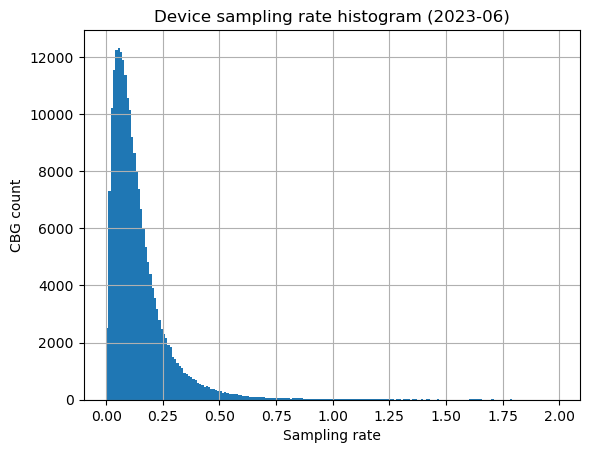

In [132]:
fig, ax = plt.subplots()
month = 6
ax.set_title(f"Device sampling rate histogram ({year}-{month:02})")
ax.set_xlabel("Sampling rate")
ax.set_ylabel("CBG count")

panel_ACS_df.query("totalpopulation > 0  ")['sampling_rate'].dropna().hist(ax=ax, bins=np.array(range(0, 200,1))/100)

In [133]:
# get people_per_device of a county

panel_ACS_df['county_FIPS'] = panel_ACS_df['CBG_FIPS'].str[:5]
sampling_rate_county_df = panel_ACS_df.groupby(['county_FIPS'], as_index=False).agg(    # , 'YEAR', "MON", "REGION", "ISO_COUNTRY_CODE"
    county_device=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_daytime=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_population=('totalpopulation', 'sum'),
    ) 

sampling_rate_county_df['person_per_device_county'] = sampling_rate_county_df['county_device_population'] /  sampling_rate_county_df['county_device']

print("National device and population count:\n")
print(sampling_rate_county_df[['county_device', 'county_device_population']].sum())

people_per_device_df = panel_ACS_df.merge(sampling_rate_county_df, left_on='county_FIPS', right_on='county_FIPS')
people_per_device_df.to_csv(person_per_device_fname, index=False)
people_per_device_df

National device and population count:

county_device                45282809
county_device_population    327227353
dtype: int64


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US       010010201001   
1       2023    6     AL               US       010010201002   
2       2023    6     AL               US       010010202001   
3       2023    6     AL               US       010010202002   
4       2023    6     AL               US       010010203001   
...      ...  ...    ...              ...                ...   
219119  2023    6     PR               US       721537506011   
219120  2023    6     PR               US       721537506012   
219121  2023    6     PR               US       721537506013   
219122  2023    6     PR               US       721537506021   
219123  2023    6     PR               US       721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219119                       73                            85.0  721537506011   
219120                      244                           189.0  721537506012   
219121                      134                           103.0  721537506013   
219122                      122                           146.0  721537506021   
219123                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate county_FIPS  \
0                   730          11.967213       0.083562       01001   
1                  1263           9.425373       0.106097       01001   
2                   835          19.880952       0.050299       01001   
3                  1124          13.223529       0.075623       01001   
4                  2774          10.124088       0.098774       01001   
...                 ...                ...            ...         ...   
219119              883          12.095890       0.082673       72153   
219120             2523          10.340164       0.096710       72153   
219121              991           7.395522       0.135217       72153   
219122             1577          12.926230       0.077362       72153   
219123              648          12.000000       0.083333       72153   

        county_device  county_device_daytime  county_device_population  \
0                8252                   8252                     55380   
1                8252                   8252                     55380   
2                8252                   8252                     55380   
3                8252                   8252                     55380   
4                8252                   8252                     55380   
...               ...                    ...                       ...   
219119           4885                   4885                     35428   
219120           4885                   4885                     35428   
219121           4885                   4885                     35428   
219122           4885                   4885                     35428   
219123           4885                   4885                     35428   

        person_per_device_county  
0                       6.711100  
1                       6.711100  
2                       6.711100  
3                       6.711100  
4                       6.711100  
...                          ...  
219119                  7.252405  
219120                  7.252405  
219121                  7.252405  
219122                  7.252405  
219123                  7.252405  

[219124 rows x 16 columns]

In [134]:
# sampling_rate

## Compute the inbounds for each destination CBG

merge the device_home_area and person_per_device, then groupby the destination

In [136]:
# device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={"origin":str, "destination":str})
device_home_areas_df

origin   destination     device        stop
0         010010201001  010010201001  97.887097  297.500000
1         010010208021  010010201001  73.415323  223.125000
2         010510313001  010010201001  61.762097  187.708333
3         010010205001  010010201001  48.943548  148.750000
4         011010059011  010010201001  37.290323  113.333333
...                ...           ...        ...         ...
99501279  370810105002  780309900000   7.663866   27.596639
99501280  530330284024  780309900000   7.663866   27.596639
99501281  780309601002  780309900000   7.663866   27.596639
99501282  120860090361  780309900000   7.663866   27.596639
99501283  483396920021  780309900000   7.663866   27.596639

[99501284 rows x 4 columns]

In [137]:
# people_per_device_df = pd.read_csv(person_per_device_fname, index=False)

print("Loading people_per_device_df from:", person_per_device_fname)
person_per_device_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS": str})

print("Total totalpopulation (billion):", person_per_device_df['totalpopulation'].sum() / 10**9)
person_per_device_df

Loading people_per_device_df from: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\person_per_device_2023_06.csv
Total totalpopulation (billion): 0.327227353


YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US         10010201001   
1       2023    6     AL               US         10010201002   
2       2023    6     AL               US         10010202001   
3       2023    6     AL               US         10010202002   
4       2023    6     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
219119  2023    6     PR               US        721537506011   
219120  2023    6     PR               US        721537506012   
219121  2023    6     PR               US        721537506013   
219122  2023    6     PR               US        721537506021   
219123  2023    6     PR               US        721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219119                       73                            85.0  721537506011   
219120                      244                           189.0  721537506012   
219121                      134                           103.0  721537506013   
219122                      122                           146.0  721537506021   
219123                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate  county_FIPS  \
0                   730          11.967213       0.083562         1001   
1                  1263           9.425373       0.106097         1001   
2                   835          19.880952       0.050299         1001   
3                  1124          13.223529       0.075623         1001   
4                  2774          10.124088       0.098774         1001   
...                 ...                ...            ...          ...   
219119              883          12.095890       0.082673        72153   
219120             2523          10.340164       0.096710        72153   
219121              991           7.395522       0.135217        72153   
219122             1577          12.926230       0.077362        72153   
219123              648          12.000000       0.083333        72153   

        county_device  county_device_daytime  county_device_population  \
0                8252                   8252                     55380   
1                8252                   8252                     55380   
2                8252                   8252                     55380   
3                8252                   8252                     55380   
4                8252                   8252                     55380   
...               ...                    ...                       ...   
219119           4885                   4885                     35428   
219120           4885                   4885                     35428   
219121           4885                   4885                     35428   
219122           4885                   4885                     35428   
219123           4885                   4885                     35428   

        person_per_device_county  
0                       6.711100  
1                       6.711100  
2                       6.711100  
3                       6.711100  
4                       6.711100  
...                          ...  
219119                  7.252405  
219120                  7.252405  
219121                  7.252405  
219122                  7.252405  
219123                  7.252405  

[219124 rows x 16 columns]

In [138]:
origin_person_per_device_df = device_home_areas_df.merge(person_per_device_df[['CBG_FIPS', 'person_per_device', 'person_per_device_county']], left_on="origin", right_on="CBG_FIPS")
origin_person_per_device_df

origin   destination     device        stop      CBG_FIPS  \
0         010010201001  010010201001  97.887097  297.500000  010010201001   
1         010010201001  010010201002  10.716763  135.650289  010010201001   
2         010010201001  010010202001  10.370978   32.501641  010010201001   
3         010010201001  010010202002  66.950524  241.368063  010010201001   
4         010010201001  010010203001  26.004824  236.411313  010010201001   
...                ...           ...        ...         ...           ...   
99219511  721537501012  721537501012  19.687500  283.500000  721537501012   
99219512  721537501012  721537505022   7.103164   27.147180  721537501012   
99219513  721537501021  721537501021  28.137931  258.048276  721537501021   
99219514  721537501021  721537505011   7.366337   36.524752  721537501021   
99219515  721537506022  721537506022  13.090909  230.272727  721537506022   

          person_per_device  person_per_device_county  
0                 11.967213                  6.711100  
1                 11.967213                  6.711100  
2                 11.967213                  6.711100  
3                 11.967213                  6.711100  
4                 11.967213                  6.711100  
...                     ...                       ...  
99219511          16.240741                  7.252405  
99219512          16.240741                  7.252405  
99219513          12.633028                  7.252405  
99219514          12.633028                  7.252405  
99219515          12.000000                  7.252405  

[99219516 rows x 7 columns]

In [139]:
origin_person_per_device_df['person_CBG_rate'] = origin_person_per_device_df['device'] * origin_person_per_device_df['person_per_device']
origin_person_per_device_df['person_county_rate'] = origin_person_per_device_df['device'] * origin_person_per_device_df['person_per_device_county']
origin_person_per_device_df[['person_CBG_rate','person_county_rate']].sum() / 10**9

person_CBG_rate       9.604674
person_county_rate    8.071316
dtype: float64

In [140]:
origin_person_per_device_df[['person_CBG_rate', 'device','stop']].sum() / 10**9

person_CBG_rate    9.604674
device             0.885534
stop               5.182593
dtype: float64

In [141]:
def get_inbound_person_per_device(df):
    inboud_per_per_device_CBG_rate = df['person_CBG_rate'].sum() /  df['device'].sum()
    inboud_per_per_device_county_rate = df['person_county_rate'].sum() /  df['device'].sum()
    return {"inboud_per_per_device_CBG_rate": inboud_per_per_device_CBG_rate, "inboud_per_per_device_county_rate": inboud_per_per_device_county_rate}

CBG_destination_inbound_per_device = origin_person_per_device_df.iloc[:].groupby('destination').progress_apply(get_inbound_person_per_device)
CBG_destination_inbound_per_device_df = pd.DataFrame(CBG_destination_inbound_per_device.tolist(), index=CBG_destination_inbound_per_device.index)
CBG_destination_inbound_per_device_df.to_csv(CBG_destination_inbound_per_device_fname)
print(CBG_destination_inbound_per_device_df.mean())
CBG_destination_inbound_per_device_df

 99%|███████████████████████████████████████████████████████████████████████▍| 218690/220494 [01:29<00:00, 3458.98it/s]C:\Users\N\AppData\Local\Temp\ipykernel_7632\1583561830.py:2: RuntimeWarning: invalid value encountered in double_scalars
  inboud_per_per_device_CBG_rate = df['person_CBG_rate'].sum() /  df['device'].sum()
C:\Users\N\AppData\Local\Temp\ipykernel_7632\1583561830.py:3: RuntimeWarning: invalid value encountered in double_scalars
  inboud_per_per_device_county_rate = df['person_county_rate'].sum() /  df['device'].sum()
100%|████████████████████████████████████████████████████████████████████████| 220494/220494 [01:32<00:00, 2386.94it/s]


inboud_per_per_device_CBG_rate       13.561657
inboud_per_per_device_county_rate    10.850707
dtype: float64


inboud_per_per_device_CBG_rate  \
destination                                    
010010201001                        6.510638   
010010201002                        7.205166   
010010202001                        7.786288   
010010202002                        6.625510   
010010203001                        6.536390   
...                                      ...   
780309611001                        7.729861   
780309611002                        9.159420   
780309612001                        6.548185   
780309612002                        6.419818   
780309900000                        4.614794   

              inboud_per_per_device_county_rate  
destination                                      
010010201001                           6.292780  
010010201002                           6.256949  
010010202001                           6.350852  
010010202002                           6.397459  
010010203001                           6.150465  
...                                         ...  
780309611001                           7.581845  
780309611002                           6.982670  
780309612001                           5.688971  
780309612002                           6.390585  
780309900000                           5.663273  

[220494 rows x 2 columns]

In [142]:
print("Loading CBG_destination_inbound_per_device_df from:", CBG_destination_inbound_per_device_fname)
CBG_destination_inbound_per_device_df = pd.read_csv(CBG_destination_inbound_per_device_fname, dtype={"destination": str}).set_index('destination')

print("CBG_destination_inbound_per_device_df.mean(): \n", CBG_destination_inbound_per_device_df.mean() )
CBG_destination_inbound_per_device_df

Loading CBG_destination_inbound_per_device_df from: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\CBG_destination_inbound_per_device_202306.csv
CBG_destination_inbound_per_device_df.mean(): 
 inboud_per_per_device_CBG_rate       13.561657
inboud_per_per_device_county_rate    10.850707
dtype: float64


inboud_per_per_device_CBG_rate  \
destination                                    
010010201001                        6.510638   
010010201002                        7.205166   
010010202001                        7.786288   
010010202002                        6.625510   
010010203001                        6.536390   
...                                      ...   
780309611001                        7.729861   
780309611002                        9.159420   
780309612001                        6.548185   
780309612002                        6.419818   
780309900000                        4.614794   

              inboud_per_per_device_county_rate  
destination                                      
010010201001                           6.292780  
010010201002                           6.256949  
010010202001                           6.350852  
010010202002                           6.397459  
010010203001                           6.150465  
...                                         ...  
780309611001                           7.581845  
780309611002                           6.982670  
780309612001                           5.688971  
780309612002                           6.390585  
780309900000                           5.663273  

[220494 rows x 2 columns]

In [143]:
print("Loading adjusted_dwelling_time_stop_CBG_df from:", adjusted_dwelling_time_stop_CBG_fname)
adjusted_dwelling_time_stop_CBG_df = pd.read_csv(adjusted_dwelling_time_stop_CBG_fname, dtype={"CBG": str}).set_index('CBG')

print("Total adjusted hourly stops (billion):", adjusted_dwelling_time_stop_CBG_df.iloc[:, 1:].sum().sum() / 10**9)
adjusted_dwelling_time_stop_CBG_df

Loading adjusted_dwelling_time_stop_CBG_df from: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\adjusted_dwelling_time_stop_CBG_2023_06.csv
Total adjusted hourly stops (billion): 5.192881605


hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  \
CBG                                                                            
010010201001       0       0      23       0       0       0       0       0   
010010201002      33      33      33       0       0       0       0       0   
010010202001      14      24       0       0       0       0       0       0   
010010202002      92      20       0       0       0      14       0     153   
010010203001      33       0       0       0       0       0       0      24   
...              ...     ...     ...     ...     ...     ...     ...     ...   
780309611001       2       0       0       7       4       4      11      10   
780309611002       0       0       0       0       0       0       9      16   
780309612001       2       0       0       0       0       0       6       6   
780309612002       2       0       0       0       6       5       2      26   
780309900000      10       2       4       7       7       0       2       0   

              hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
CBG                                                                          
010010201001       0        0        0       43       23       14       19   
010010201002       0        0       22       43       43       21       21   
010010202001       0       16        0       19       16        0       18   
010010202002      95       42       61       42       21       52       60   
010010203001      41       17       58       97       79       40       62   
...              ...      ...      ...      ...      ...      ...      ...   
780309611001      16       26       15       16       44       20       17   
780309611002      22       25       13       12       23       18       22   
780309612001       3        5        5        3        2        3        5   
780309612002      11       26       16       10       20       14       10   
780309900000       0        0        0        4        0        0        0   

              hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
CBG                                                                           
010010201001        0       15       52       22       14       20       19   
010010201002       21       41       63       83       84       65       65   
010010202001        0       22       37        0        0       23        0   
010010202002       38       72       75      132       33        0       14   
010010203001       80       58       64       76       52       60       80   
...               ...      ...      ...      ...      ...      ...      ...   
780309611001       18       22       33       23        2        0        1   
780309611002       12       21       21        5        4       12        8   
780309612001       10        6       10        4        3        0        5   
780309612002       21       18       16       18       16        0        1   
780309900000        3        8        2        0        3        0        0   

              hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
CBG                                                                           
010010201001       22        0        0       19        0       16        0   
010010201002       63       39       19        0        0        0        0   
010010202001       22       24        0        0        0        0        0   
010010202002       42       22       22        0        0        0        0   
010010203001       81       85       48       24        0        0        0   
...               ...      ...      ...      ...      ...      ...      ...   
780309611001        8        0        0        0        0        0        0   
780309611002        4        2        0        5        0        0        0   
780309612001        0        0        0        0        0        0        0   
780309612002        0       10        9        5        0    

In [144]:
adjusted_dwelling_time_stop_inbound_per_device_CBG_df = adjusted_dwelling_time_stop_CBG_df.merge(CBG_destination_inbound_per_device_df,left_index=True, right_index=True)
adjusted_dwelling_time_stop_inbound_per_device_CBG_df.index.name = 'CBG'
adjusted_dwelling_time_stop_inbound_per_device_CBG_df

hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  \
CBG                                                                            
010010201001       0       0      23       0       0       0       0       0   
010010201002      33      33      33       0       0       0       0       0   
010010202001      14      24       0       0       0       0       0       0   
010010202002      92      20       0       0       0      14       0     153   
010010203001      33       0       0       0       0       0       0      24   
...              ...     ...     ...     ...     ...     ...     ...     ...   
780309611001       2       0       0       7       4       4      11      10   
780309611002       0       0       0       0       0       0       9      16   
780309612001       2       0       0       0       0       0       6       6   
780309612002       2       0       0       0       6       5       2      26   
780309900000      10       2       4       7       7       0       2       0   

              hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
CBG                                                                          
010010201001       0        0        0       43       23       14       19   
010010201002       0        0       22       43       43       21       21   
010010202001       0       16        0       19       16        0       18   
010010202002      95       42       61       42       21       52       60   
010010203001      41       17       58       97       79       40       62   
...              ...      ...      ...      ...      ...      ...      ...   
780309611001      16       26       15       16       44       20       17   
780309611002      22       25       13       12       23       18       22   
780309612001       3        5        5        3        2        3        5   
780309612002      11       26       16       10       20       14       10   
780309900000       0        0        0        4        0        0        0   

              hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
CBG                                                                           
010010201001        0       15       52       22       14       20       19   
010010201002       21       41       63       83       84       65       65   
010010202001        0       22       37        0        0       23        0   
010010202002       38       72       75      132       33        0       14   
010010203001       80       58       64       76       52       60       80   
...               ...      ...      ...      ...      ...      ...      ...   
780309611001       18       22       33       23        2        0        1   
780309611002       12       21       21        5        4       12        8   
780309612001       10        6       10        4        3        0        5   
780309612002       21       18       16       18       16        0        1   
780309900000        3        8        2        0        3        0        0   

              hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
CBG                                                                           
010010201001       22        0        0       19        0       16        0   
010010201002       63       39       19        0        0        0        0   
010010202001       22       24        0        0        0        0        0   
010010202002       42       22       22        0        0        0        0   
010010203001       81       85       48       24        0        0        0   
...               ...      ...      ...      ...      ...      ...      ...   
780309611001        8        0        0        0        0        0        0   
780309611002        4        2        0        5        0        0        0   
780309612001        0        0        0        0        0        0        0   
780309612002        0       10        9        5        0    

In [145]:
hour_cnt = adjusted_dwelling_time_stop_CBG_df.shape[1]
print("hour_cnt:", hour_cnt)

hour_cnt: 720


In [146]:
# inbound_hourly_df.iloc[:, hour]
# inbound_hourly_df.loc[:, 'inboud_per_per_device_CBG_rate']

In [147]:

inbound_hourly_df = adjusted_dwelling_time_stop_inbound_per_device_CBG_df.astype(np.float64).copy()

for hour in tqdm(range(hour_cnt)):
    # inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_CBG_rate']   # 70.4215236989238 billion
    inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_county_rate']   # 56.34291367286323 billion
print("Total restored inbound (billion) using per_device_county_rate:",  inbound_hourly_df.iloc[:, :hour].sum().sum() / 10**9)

inbound_hourly_df = adjusted_dwelling_time_stop_inbound_per_device_CBG_df.astype(np.float64).copy()

for hour in tqdm(range(hour_cnt)):
    inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_CBG_rate']   # 70.4215236989238 billion
    # inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_county_rate']   # 56.34291367286323 billion
print("Total restored inbound (billion) using per_device_CBG_rate:",  inbound_hourly_df.iloc[:, :hour].sum().sum() / 10**9)

print("We will use the larger resutls: per_device_CBG_rate.")

print("Saving inbound_hourly_df at:", inbound_hourly_df_fname)

if save_file:
    inbound_hourly_df.to_csv(inbound_hourly_df_fname)
inbound_hourly_df

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 439.64it/s]


Total restored inbound (billion) using per_device_county_rate: 51.178735299160714


100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 443.12it/s]


Total restored inbound (billion) using per_device_CBG_rate: 61.49318556384339
We will use the larger resutls: per_device_CBG_rate.
Saving inbound_hourly_df at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\inbound_hourly_202306.csv


hour_1      hour_2      hour_3     hour_4     hour_5  \
CBG                                                                      
010010201001    0.000000    0.000000  149.744675   0.000000   0.000000   
010010201002  237.770469  237.770469  237.770469   0.000000   0.000000   
010010202001  109.008027  186.870903    0.000000   0.000000   0.000000   
010010202002  609.546918  132.510200    0.000000   0.000000   0.000000   
010010203001  215.700876    0.000000    0.000000   0.000000   0.000000   
...                  ...         ...         ...        ...        ...   
780309611001   15.459721    0.000000    0.000000  54.109024  30.919442   
780309611002    0.000000    0.000000    0.000000   0.000000   0.000000   
780309612001   13.096371    0.000000    0.000000   0.000000   0.000000   
780309612002   12.839636    0.000000    0.000000   0.000000  38.518909   
780309900000   46.147936    9.229587   18.459175  32.303555  32.303555   

                 hour_6     hour_7       hour_8      hour_9     hour_10  \
CBG                                                                       
010010201001   0.000000   0.000000     0.000000    0.000000    0.000000   
010010201002   0.000000   0.000000     0.000000    0.000000    0.000000   
010010202001   0.000000   0.000000     0.000000    0.000000  124.580602   
010010202002  92.757140   0.000000  1013.703027  629.423448  278.271419   
010010203001   0.000000   0.000000   156.873364  267.991997  111.118633   
...                 ...        ...          ...         ...         ...   
780309611001  30.919442  85.028466    77.298605  123.677768  200.976373   
780309611002   0.000000  82.434778   146.550716  201.507235  228.985494   
780309612001   0.000000  39.289113    39.289113   19.644556   32.740927   
780309612002  32.099091  12.839636   166.915271   70.617999  166.915271   
780309900000   0.000000   9.229587     0.000000    0.000000    0.000000   

                 hour_11     hour_12     hour_13     hour_14     hour_15  \
CBG                                                                        
010010201001    0.000000  279.957435  149.744675   91.148932  123.702123   
010010201002  158.513646  309.822127  309.822127  151.308480  151.308480   
010010202001    0.000000  147.939465  124.580602    0.000000  140.153177   
010010202002  404.156109  278.271419  139.135710  344.526519  397.530599   
010010203001  379.110631  634.029848  516.374824  261.455607  405.256191   
...                  ...         ...         ...         ...         ...   
780309611001  115.947908  123.677768  340.113863  154.597210  131.407629   
780309611002  119.072457  109.913037  210.666655  164.869556  201.507235   
780309612001   32.740927   19.644556   13.096371   19.644556   32.740927   
780309612002  102.717090   64.198181  128.396362   89.877453   64.198181   
780309900000    0.000000   18.459175    0.000000    0.000000    0.000000   

                 hour_16     hour_17     hour_18     hour_19     hour_20  \
CBG                                                                        
010010201001    0.000000   97.659571  338.553178  143.234037   91.148932   
010010201002  151.308480  295.411795  453.925441  598.028756  605.233922   
010010202001    0.000000  171.298328  288.092642    0.000000    0.000000   
010010202002  251.769379  477.036718  496.913248  874.567317  218.641829   
010010203001  522.911215  379.110631  418.328972  496.765654  339.892289   
...                  ...         ...         ...         ...         ...   
780309611001  139.137489  170.056931  255.085397  177.786792   15.459721   
780309611002  109.913037  192.347815  192.347815   45.797099   36.637679   
780309612001   65.481855   39.289113   65.481855   26.192742   19.644556   
780309612002  134.816180  115.556726  102.717090  115.556726  102.717090   
780309900000   13.844381   36.918349    9.229587    0.000000   13.844381   

                 hour_21     hour_22     hour_23     hour_24     hour_25  \
CBG                      

In [148]:
# Get the hourly aggregated inbounds for all CBGs
inbound_hourly_df.iloc[:, :hour_cnt].sum().sum() / 10**9

61.53922122746314

In [149]:
hourly_agregated_inbound_df = pd.DataFrame(inbound_hourly_df.iloc[:, :hour_cnt].sum(), columns=['inboud']).reset_index()[['inboud']]

# if save_file:
hourly_agregated_inbound_df.to_csv(hourly_agregated_inbound_fname, index=False)
print("Save hourly_agregated_inbound_df at:", hourly_agregated_inbound_fname)

CBG_agregated_inbound_df = pd.DataFrame(inbound_hourly_df.iloc[:, :hour_cnt].sum(axis=1), columns=['inboud'])
CBG_agregated_inbound_df.to_csv(CBG_agregated_inbound_fname)
print("Save CBG_agregated_inbound_df at:", CBG_agregated_inbound_fname)

Save hourly_agregated_inbound_df at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\hourly_agregated_inbound_202306.csv
Save CBG_agregated_inbound_df at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\CBG_agregated_inbound_202306.csv


In [150]:
hourly_agregated_inbound_df
# CBG_agregated_inbound_df.sum()

inboud
0    4.497873e+07
1    3.505929e+07
2    3.174563e+07
3    3.273093e+07
4    3.931367e+07
..            ...
715  1.135927e+08
716  9.902240e+07
717  8.276372e+07
718  6.609113e+07
719  4.603566e+07

[720 rows x 1 columns]

In [151]:
CBG_agregated_inbound_df

inboud
CBG                        
010010201001   51466.593654
010010201002  112724.817890
010010202001   42824.581939
010010202002  210651.464245
010010203001  293666.938108
...                     ...
780309611001   76139.126070
780309611002   59811.011099
780309612001   10300.295740
780309612002   53284.490258
780309900000    7577.491133

[220494 rows x 1 columns]

In [152]:
people_per_device_df

YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US       010010201001   
1       2023    6     AL               US       010010201002   
2       2023    6     AL               US       010010202001   
3       2023    6     AL               US       010010202002   
4       2023    6     AL               US       010010203001   
...      ...  ...    ...              ...                ...   
219119  2023    6     PR               US       721537506011   
219120  2023    6     PR               US       721537506012   
219121  2023    6     PR               US       721537506013   
219122  2023    6     PR               US       721537506021   
219123  2023    6     PR               US       721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219119                       73                            85.0  721537506011   
219120                      244                           189.0  721537506012   
219121                      134                           103.0  721537506013   
219122                      122                           146.0  721537506021   
219123                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate county_FIPS  \
0                   730          11.967213       0.083562       01001   
1                  1263           9.425373       0.106097       01001   
2                   835          19.880952       0.050299       01001   
3                  1124          13.223529       0.075623       01001   
4                  2774          10.124088       0.098774       01001   
...                 ...                ...            ...         ...   
219119              883          12.095890       0.082673       72153   
219120             2523          10.340164       0.096710       72153   
219121              991           7.395522       0.135217       72153   
219122             1577          12.926230       0.077362       72153   
219123              648          12.000000       0.083333       72153   

        county_device  county_device_daytime  county_device_population  \
0                8252                   8252                     55380   
1                8252                   8252                     55380   
2                8252                   8252                     55380   
3                8252                   8252                     55380   
4                8252                   8252                     55380   
...               ...                    ...                       ...   
219119           4885                   4885                     35428   
219120           4885                   4885                     35428   
219121           4885                   4885                     35428   
219122           4885                   4885                     35428   
219123           4885                   4885                     35428   

        person_per_device_county  
0                       6.711100  
1                       6.711100  
2                       6.711100  
3                       6.711100  
4                       6.711100  
...                          ...  
219119                  7.252405  
219120                  7.252405  
219121                  7.252405  
219122                  7.252405  
219123                  7.252405  

[219124 rows x 16 columns]

In [153]:
# Load flow data (month)
# device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={'origin':str, 'destination':str})
device_home_areas_df

origin   destination     device        stop
0         010010201001  010010201001  97.887097  297.500000
1         010010208021  010010201001  73.415323  223.125000
2         010510313001  010010201001  61.762097  187.708333
3         010010205001  010010201001  48.943548  148.750000
4         011010059011  010010201001  37.290323  113.333333
...                ...           ...        ...         ...
99501279  370810105002  780309900000   7.663866   27.596639
99501280  530330284024  780309900000   7.663866   27.596639
99501281  780309601002  780309900000   7.663866   27.596639
99501282  120860090361  780309900000   7.663866   27.596639
99501283  483396920021  780309900000   7.663866   27.596639

[99501284 rows x 4 columns]

In [154]:
device_home_areas_person_per_device_df = device_home_areas_df.merge(people_per_device_df[['CBG_FIPS', 'person_per_device', 'person_per_device_county']], left_on='origin', right_on='CBG_FIPS')
device_home_areas_person_per_device_df

origin   destination     device        stop      CBG_FIPS  \
0         010010201001  010010201001  97.887097  297.500000  010010201001   
1         010010201001  010010201002  10.716763  135.650289  010010201001   
2         010010201001  010010202001  10.370978   32.501641  010010201001   
3         010010201001  010010202002  66.950524  241.368063  010010201001   
4         010010201001  010010203001  26.004824  236.411313  010010201001   
...                ...           ...        ...         ...           ...   
99219511  721537501012  721537501012  19.687500  283.500000  721537501012   
99219512  721537501012  721537505022   7.103164   27.147180  721537501012   
99219513  721537501021  721537501021  28.137931  258.048276  721537501021   
99219514  721537501021  721537505011   7.366337   36.524752  721537501021   
99219515  721537506022  721537506022  13.090909  230.272727  721537506022   

          person_per_device  person_per_device_county  
0                 11.967213                  6.711100  
1                 11.967213                  6.711100  
2                 11.967213                  6.711100  
3                 11.967213                  6.711100  
4                 11.967213                  6.711100  
...                     ...                       ...  
99219511          16.240741                  7.252405  
99219512          16.240741                  7.252405  
99219513          12.633028                  7.252405  
99219514          12.633028                  7.252405  
99219515          12.000000                  7.252405  

[99219516 rows x 7 columns]

In [155]:
device_home_areas_person_per_device_df['stop'].sum() / 10**9, device_home_areas_person_per_device_df['device'].sum() / 10**9

(5.182593093173373, 0.8855341314235071)

In [156]:
# Not correct
# device_home_areas_person_per_device_df['outbound'] = device_home_areas_person_per_device_df['stop'] * device_home_areas_person_per_device_df['person_per_device']
# device_home_areas_person_per_device_df['outbound'].sum()  / 10**9

In [157]:
# no_dict_colum_month_df = pd.read_csv(no_dict_colum_fname, dtype={"AREA":str})
no_dict_colum_month_df['destination'] = no_dict_colum_month_df['AREA'].astype(str).str.zfill(12)
no_dict_colum_month_df

AREA                                       STOPS_BY_DAY  \
0       010010201001  [286,254,196,74,246,284,287,227,272,212,249,20...   
1       010010201002  [248,206,132,132,191,155,156,98,94,172,118,130...   
2       010010202001  [229,61,189,267,93,72,191,112,215,177,52,152,5...   
3       010010202002  [1097,900,666,861,707,1145,1070,1164,731,609,7...   
4       010010203001  [513,618,497,493,552,532,616,685,407,712,900,5...   
...              ...                                                ...   
220679  780309611001  [305,280,267,197,490,481,484,463,401,229,157,3...   
220680  780309611002  [266,212,246,173,261,247,252,182,190,165,132,2...   
220681  780309612001  [58,41,28,47,62,50,74,48,23,34,33,40,53,53,69,...   
220682  780309612002  [238,239,234,158,280,361,436,343,251,194,130,2...   
220683  780309900000  [51,47,89,20,40,79,95,75,19,5,36,40,58,71,12,7...   

        RAW_STOP_COUNTS  RAW_DEVICE_COUNTS  MEDIAN_DWELL  \
0                  7936               2601     33.350000   
1                  5227               1236    157.716667   
2                  5516               1755     40.016667   
3                 31985               8819     10.500000   
4                 22648               4942    101.683333   
...                 ...                ...           ...   
220679            10067               2279     13.533333   
220680             6727               1563     11.566667   
220681             1439                416     42.866667   
220682             8328               2040     10.966667   
220683             1653                456      1.500000   

                                       STOPS_BY_EACH_HOUR  adjusted_raw_stop  \
0       [0,0,23,0,0,0,0,0,0,0,0,43,23,14,19,0,15,52,22...               7905   
1       [33,0,0,0,0,0,0,0,0,0,22,21,0,0,21,0,20,43,20,...              15645   
2       [14,24,0,0,0,0,0,0,0,16,0,19,16,0,18,0,22,37,0...               5500   
3       [92,20,0,0,0,14,0,153,95,42,61,42,21,52,60,38,...              31794   
4       [0,0,0,0,0,0,0,24,17,0,58,39,40,0,62,18,40,24,...              44928   
...                                                   ...                ...   
220679  [2,0,0,7,4,4,11,10,16,26,15,16,44,20,17,18,22,...               9850   
220680  [0,0,0,0,0,0,9,16,22,25,13,12,23,18,22,12,21,2...               6530   
220681  [-2,0,0,0,0,0,6,6,3,5,5,-3,2,-3,5,10,6,10,4,-3...               1573   
220682  [-2,0,0,0,6,5,-2,26,11,26,16,10,20,14,10,21,18...               8300   
220683  [10,-2,-4,7,7,0,-2,0,0,0,0,-4,0,0,0,3,8,-2,0,3...               1642   

         destination  
0       010010201001  
1       010010201002  
2       010010202001  
3       010010202002  
4       010010203001  
...              ...  
220679  780309611001  
220680  780309611002  
220681  780309612001  
220682  780309612002  
220683  780309900000  

[220684 rows x 8 columns]

In [158]:
no_dict_colum_month_df['adjusted_raw_stop'].sum() / 10**9

5.196196864

In [159]:
# destination_CBG_inbound_df = device_home_areas_person_per_device_df.groupby('destination', as_index=False)[['inbound']].sum()#.sum()
# destination_CBG_inbound_df['destination'] = destination_CBG_inbound_df['destination'].astype(str).str.zfill(12)

# destination_CBG_inbound_device_device_count_df = destination_CBG_inbound_df.merge(no_dict_colum_month_df[['destination', 'RAW_STOP_COUNTS', 'RAW_DEVICE_COUNTS', 'MEDIAN_DWELL']],
#                                                                                  left_on="destination",
#                                                                                  right_on="destination")

# destination_CBG_inbound_device_device_count_df['inbound_per_stop'] = destination_CBG_inbound_device_device_count_df['inbound'] / destination_CBG_inbound_device_device_count_df['RAW_STOP_COUNTS']
# destination_CBG_inbound_device_device_count_df

In [160]:
# destination_CBG_inbound_device_device_count_df['inbound'].sum() / 1000000000, destination_CBG_inbound_device_device_count_df['RAW_STOP_COUNTS'].sum() / 1000000000

In [161]:
# destination_CBG_inbound_device_device_count_df.to_csv(CBG_destination_inbound_fname, index=False)
# print("Saved destination_CBG_inbound_device_device_count_df as:", CBG_destination_inbound_fname)
# destination_CBG_inbound_device_device_count_df

In [162]:
# destination_CBG_inbound_device_device_count_df['inbound'].sum() / 1000000000

## Compute the hourly inbound (not used, not correct)

In [163]:
# destination_CBG_inbound_df = pd.read_csv(CBG_destination_inbound_fname, dtype={'destination':str})
# destination_CBG_inbound_df

In [164]:
# destination_CBG_inbound_df.sample(30)['inbound_per_stop']#.mean()

In [165]:
# print("Loading in adjusted_dwelling_time_stop_CBG_df from:", adjusted_dwelling_time_stop_CBG_fname)
# adjusted_dwelling_time_stop_CBG_df = pd.read_csv(adjusted_dwelling_time_stop_CBG_fname, dtype={'CBG':str})
# print("Total adjusted observed stop (billion):", adjusted_dwelling_time_stop_CBG_df.iloc[:, 1:].sum().sum() / 1000000000)
# adjusted_dwelling_time_stop_CBG_df

In [166]:
# hour_cnt = adjusted_dwelling_time_stop_CBG_df.shape[1] - 1
# print("hour_cnt:", hour_cnt)

In [167]:
# adjusted_stop_inbound_per_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.merge(destination_CBG_inbound_df[['destination','inbound_per_stop']],
#                                                                                 left_on="CBG",
#                                                                                 right_on="destination",
#                                                                                 )
# adjusted_stop_inbound_per_stop_CBG_df

In [168]:
# hourly_inbound_df = adjusted_stop_inbound_per_stop_CBG_df.copy()
# for h in range(hour_cnt):
#     hourly_inbound_df.iloc[:, h + 1] = hourly_inbound_df.iloc[:, h + 1] * hourly_inbound_df['inbound_per_stop']  

# hourly_inbound_df = hourly_inbound_df.iloc[:, :-2]
# print("Total inbound (billion):", hourly_inbound_df.iloc[:, 1:].sum().sum() / 1000000000)
# hourly_inbound_df

In [169]:
# hourly_inbound_df.iloc[:, 1:].sum().sum()

# IPF  v2

### Restored the outbound according to device sampling rate

In [170]:
CBG_device_stop_origin_distribution_df = pd.read_csv(CBG_device_stop_origin_distribution_fname)
print("Total observed stops (billion): ", CBG_device_stop_origin_distribution_df['stop'].sum() / 1000000000)
CBG_device_stop_origin_distribution_df

Total observed stops (billion):  5.196190454


origin       device          stop
0       010010201001  2133.150088  11778.866131
1       010010201002  4416.497113  26744.864916
2       010010202001  2326.502639  13063.070058
3       010010202002  3612.349983  20646.075626
4       010010203001  9502.941001  55814.699502
...              ...          ...           ...
230742   CA:61060145     4.947764     32.678746
230743   CA:61060158    45.079326    209.415291
230744   CA:61060159   361.099883   1459.858534
230745   CA:62040060    16.555032    102.423165
230746   CA:62050013     6.263577     10.299550

[230747 rows x 3 columns]

In [171]:
people_per_device_df = pd.read_csv(person_per_device_fname, dtype={'CBG_FIPS': str})
people_per_device_df

YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US         10010201001   
1       2023    6     AL               US         10010201002   
2       2023    6     AL               US         10010202001   
3       2023    6     AL               US         10010202002   
4       2023    6     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
219119  2023    6     PR               US        721537506011   
219120  2023    6     PR               US        721537506012   
219121  2023    6     PR               US        721537506013   
219122  2023    6     PR               US        721537506021   
219123  2023    6     PR               US        721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219119                       73                            85.0  721537506011   
219120                      244                           189.0  721537506012   
219121                      134                           103.0  721537506013   
219122                      122                           146.0  721537506021   
219123                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate  county_FIPS  \
0                   730          11.967213       0.083562         1001   
1                  1263           9.425373       0.106097         1001   
2                   835          19.880952       0.050299         1001   
3                  1124          13.223529       0.075623         1001   
4                  2774          10.124088       0.098774         1001   
...                 ...                ...            ...          ...   
219119              883          12.095890       0.082673        72153   
219120             2523          10.340164       0.096710        72153   
219121              991           7.395522       0.135217        72153   
219122             1577          12.926230       0.077362        72153   
219123              648          12.000000       0.083333        72153   

        county_device  county_device_daytime  county_device_population  \
0                8252                   8252                     55380   
1                8252                   8252                     55380   
2                8252                   8252                     55380   
3                8252                   8252                     55380   
4                8252                   8252                     55380   
...               ...                    ...                       ...   
219119           4885                   4885                     35428   
219120           4885                   4885                     35428   
219121           4885                   4885                     35428   
219122           4885                   4885                     35428   
219123           4885                   4885                     35428   

        person_per_device_county  
0                       6.711100  
1                       6.711100  
2                       6.711100  
3                       6.711100  
4                       6.711100  
...                          ...  
219119                  7.252405  
219120                  7.252405  
219121                  7.252405  
219122                  7.252405  
219123                  7.252405  

[219124 rows x 16 columns]

In [172]:
CBG_origin_stop_distribution_sampling_rate_df = CBG_device_stop_origin_distribution_df.merge(people_per_device_df, left_on='origin', right_on='CBG_FIPS')
CBG_origin_stop_distribution_sampling_rate_df

origin       device          stop  YEAR  MON REGION  \
0       010010201001  2133.150088  11778.866131  2023    6     AL   
1       010010201002  4416.497113  26744.864916  2023    6     AL   
2       010010202001  2326.502639  13063.070058  2023    6     AL   
3       010010202002  3612.349983  20646.075626  2023    6     AL   
4       010010203001  9502.941001  55814.699502  2023    6     AL   
...              ...          ...           ...   ...  ...    ...   
218938  721537506011    21.059649    168.086717  2023    6     PR   
218939  721537506012    91.751630    803.649347  2023    6     PR   
218940  721537506013    59.201404    312.785799  2023    6     PR   
218941  721537506021    65.596146    574.634552  2023    6     PR   
218942  721537506022    13.090909    230.272727  2023    6     PR   

       ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  NUMBER_DEVICES_RESIDING  \
0                    US         10010201001                       61   
1                    US         10010201002                      134   
2                    US         10010202001                       42   
3                    US         10010202002                       85   
4                    US         10010203001                      274   
...                 ...                 ...                      ...   
218938               US        721537506011                       73   
218939               US        721537506012                      244   
218940               US        721537506013                      134   
218941               US        721537506021                      122   
218942               US        721537506022                       54   

        NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  totalpopulation  \
0                                 54.0  010010201001              730   
1                                 97.0  010010201002             1263   
2                                 48.0  010010202001              835   
3                                158.0  010010202002             1124   
4                                286.0  010010203001             2774   
...                                ...           ...              ...   
218938                            85.0  721537506011              883   
218939                           189.0  721537506012             2523   
218940                           103.0  721537506013              991   
218941                           146.0  721537506021             1577   
218942                            67.0  721537506022              648   

        person_per_device  sampling_rate  county_FIPS  county_device  \
0               11.967213       0.083562         1001           8252   
1                9.425373       0.106097         1001           8252   
2               19.880952       0.050299         1001           8252   
3               13.223529       0.075623         1001           8252   
4               10.124088       0.098774         1001           8252   
...                   ...            ...          ...            ...   
218938          12.095890       0.082673        72153           4885   
218939          10.340164       0.096710        72153           4885   
218940           7.395522       0.135217        72153           4885   
218941          12.926230       0.077362        72153           4885   
218942          12.000000       0.083333        72153           4885   

        county_device_daytime  county_device_population  \
0                        8252                     55380   
1                        8252                     55380   
2                        8252                     55380   
3                        8252                     55380   
4                        8252                     55380   
...                       ...                       ...   
218938                   4885                     35428   
218939                   4885                     35428   
218940                   4885                  

Because "stop" is the combination of visitors from various HOME CBGs! So, we need to compute the inbound. 

The outbound compuated below can be view as the distribution only.

In [173]:
person_per_device_national = CBG_origin_stop_distribution_sampling_rate_df['totalpopulation'].sum() / CBG_origin_stop_distribution_sampling_rate_df['NUMBER_DEVICES_RESIDING'].sum()
CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'] = CBG_origin_stop_distribution_sampling_rate_df['stop'] * person_per_device_national
restored_total_restored_outbound_count = CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'].sum() /  10**9
print("Restored total outbound distribution (billion) using national sampling rate:", restored_total_restored_outbound_count)  # 37.44716723845148 billion

CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'] = CBG_origin_stop_distribution_sampling_rate_df['stop'] * CBG_origin_stop_distribution_sampling_rate_df['person_per_device_county']
restored_total_restored_outbound_count = CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'].sum() /  10**9
print("Restored total outbound distribution (billion) using county sampling rate:", restored_total_restored_outbound_count)  # 50.96843487672891 billion

CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'] = CBG_origin_stop_distribution_sampling_rate_df['stop'] * CBG_origin_stop_distribution_sampling_rate_df['person_per_device']
restored_total_restored_outbound_count = CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'].sum() / 10**9
CBG_origin_stop_distribution_sampling_rate_df.to_csv(CBG_origin_outbound_distribution_sampling_rate_fname, index=False)
print("Restored total outbound distribution (billion) using CBG sampling rate:", restored_total_restored_outbound_count)  # 61.19985609714293 billion

print("Saved CBG_origin_outbound_distribution_sampling_rate at:", CBG_origin_outbound_distribution_sampling_rate_fname)

Restored total outbound distribution (billion) using national sampling rate: 37.44716723845148
Restored total outbound distribution (billion) using county sampling rate: 50.96843487672891
Restored total outbound distribution (billion) using CBG sampling rate: 61.19985609714293
Saved CBG_origin_outbound_distribution_sampling_rate at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\CBG_origin_outbound_distribution_sampling_rate_202306.csv


In [174]:
# use the total_inboud to calibrate the outbound

# restored_outbound_count

## Load data

In [175]:
hourly_agregated_inbound_df = pd.read_csv(hourly_agregated_inbound_fname)
total_inbound = hourly_agregated_inbound_df['inboud'].sum()
print("total_inbound (billion):", total_inbound / 10**9)

total_inbound (billion): 61.53922122746314


In [176]:
# hourly_agregated_inbound_df

In [177]:
CBG_restored_origin_outbound_df = pd.read_csv(CBG_origin_outbound_distribution_sampling_rate_fname)
total_outbound = CBG_restored_origin_outbound_df['restored_outbound_count'].sum()
print("Total outbound distribution (billions): ",  total_outbound / 1000000000)


factor = total_inbound / total_outbound
print("factor:", factor)


CBG_restored_origin_outbound_df['restored_outbound_count'] = CBG_restored_origin_outbound_df['restored_outbound_count'] * factor

print("Total outbound distribution (billions): ",   CBG_restored_origin_outbound_df['restored_outbound_count'].sum() / 10**9)

Total outbound distribution (billions):  61.19985609714293
factor: 1.0055451949066927
Total outbound distribution (billions):  61.539221227463116


In [178]:
CBG_restored_origin_outbound_df.shape

(218943, 20)

In [179]:
# Load 

In [180]:
# adjusted_dwelling_time_stop_natinol_df = pd.read_csv(adjusted_dwelling_time_stop_natinol_fname)
# total_adjusted_stops = adjusted_dwelling_time_stop_natinol_df['stop'].sum()
# print("total_adjusted_stops (billion):", total_adjusted_stops / 1000000000)

# # covnert distribution to acution outbound
# outbound_per_stop = total_outbound / total_adjusted_stops 

# adjusted_dwelling_time_stop_natinol_df['stop'] *= outbound_per_stop
# print("total outbouds (billion):", adjusted_dwelling_time_stop_natinol_df['stop'].sum() / 1000000000)

### start IPF

In [181]:
import numpy as np
from ipfn import ipfn

restored_CBG_outbound_arr = CBG_restored_origin_outbound_df['restored_outbound_count'].to_numpy()
restored_hourly_outbound_arr = hourly_agregated_inbound_df['inboud'].to_numpy()  # 

aggregates = [restored_CBG_outbound_arr, restored_hourly_outbound_arr]
dimensions = [[0], [1]]

seed_arr = np.ones((len(restored_CBG_outbound_arr), len(restored_hourly_outbound_arr)))

IPF = ipfn.ipfn(seed_arr, aggregates, dimensions, convergence_rate=1e-3)
m = IPF.iteration()
print(m.shape)

e:\ProgramData\Anaconda3\lib\site-packages\ipfn\ipfn.py:146: RuntimeWarning: invalid value encountered in double_scalars
  if abs(m_ijk / ori_ijk - 1) > max_conv:


(218943, 720)


In [182]:
print("Error of IPF:")
print((m.sum(axis=1) - restored_CBG_outbound_arr).sum(), (m.sum(axis=0) - restored_hourly_outbound_arr).sum())

Error of IPF:
3.400929574404188e-05 2.9712915420532227e-05


In [183]:
(m.sum(axis=1) - restored_CBG_outbound_arr).max(), (m.sum(axis=0) - restored_hourly_outbound_arr).max()

(1.4901161193847656e-08, 4.798173904418945e-06)

In [184]:
(m.sum(axis=1) - restored_CBG_outbound_arr).min(), (m.sum(axis=0) - restored_hourly_outbound_arr).min()

(0.0, -4.589557647705078e-06)

In [222]:
# Save IPF results
hourly_columns = [f'hour_{h+1}' for h in range(restored_hourly_outbound_arr.shape[0])]
IPF_df = pd.DataFrame(m, columns=hourly_columns)
print("Total outbound visitor (billion):", IPF_df.sum().sum() / 1000000000)

 
IPF_df['CBG'] = CBG_restored_origin_outbound_df['origin'].astype(str).str.zfill(12)
IPF_df = IPF_df[['CBG'] + hourly_columns]#.set_index('CBG')

if save_file:
    print("Saving IPF at:", IPF_results_fname)
    IPF_df.to_csv(IPF_results_fname, index=True)
    print("Saved IPF_results at:", IPF_results_fname)
IPF_df

Total outbound visitor (billion): 61.539221227463166


CBG      hour_1      hour_2      hour_3      hour_4  \
0       010010201001  103.598465   80.751250   73.118960   75.388398   
1       010010201002  185.266020  144.408150  130.759261  134.817716   
2       010010202001  190.870694  148.776790  134.714995  138.896226   
3       010010202002  200.651176  156.400322  141.617980  146.013464   
4       010010203001  415.299392  323.710829  293.114958  302.212546   
...              ...         ...         ...         ...         ...   
218938  721537506011    1.494266    1.164727    1.054641    1.087375   
218939  721537506012    6.107322    4.760436    4.310499    4.444286   
218940  721537506013    1.700093    1.325161    1.199912    1.237154   
218941  721537506021    5.459092    4.255164    3.852983    3.972570   
218942  721537506022    2.030863    1.582984    1.433366    1.477855   

            hour_5      hour_6      hour_7      hour_8      hour_9  \
0        90.550256  122.492258  171.171398  222.071673  243.104099   
1       161.931796  219.053951  306.107272  397.132669  434.745137   
2       166.830562  225.680779  315.367639  409.146740  447.897061   
3       175.379195  237.244979  331.527520  430.111994  470.847936   
4       362.992504  491.039711  686.181762  890.227771  974.541317   
...            ...         ...         ...         ...         ...   
218938    1.306064    1.766784    2.468914    3.203081    3.506445   
218939    5.338106    7.221146   10.090872   13.091538   14.331439   
218940    1.485967    2.010148    2.808992    3.644287    3.989437   
218941    4.771520    6.454695    9.019829   11.702004   12.810302   
218942    1.775076    2.401242    3.355509    4.353318    4.765621   

            hour_10      hour_11      hour_12      hour_13      hour_14  \
0        252.487324   266.636399   283.252630   297.525676   300.534496   
1        451.525237   476.828149   506.543096   532.067707   537.448405   
2        465.184794   491.253170   521.867054   548.163837   553.707312   
3        489.021516   516.425673   548.608256   576.252522   582.080053   
4       1012.156232  1068.876206  1135.486367  1192.703311  1204.764889   
...             ...          ...          ...          ...          ...   
218938     3.641785     3.845866     4.085533     4.291402     4.334800   
218939    14.884597    15.718712    16.698269    17.539692    17.717067   
218940     4.143420     4.375612     4.648291     4.882518     4.931894   
218941    13.304748    14.050330    14.925918    15.678032    15.836581   
218942     4.949563     5.226930     5.552661     5.832459     5.891441   

            hour_15      hour_16      hour_17      hour_18      hour_19  \
0        305.407350   314.248606   314.270044   306.096193   278.630923   
1        546.162571   561.973466   562.011803   547.394436   498.278057   
2        562.685099   578.974305   579.013803   563.954230   513.351982   
3        591.517874   608.641763   608.683284   592.852038   539.656859   
4       1224.298896  1259.741202  1259.827142  1227.060291  1116.959141   
...             ...          ...          ...          ...          ...   
218938     4.405084     4.532607     4.532916     4.415020     4.018871   
218939    18.004331    18.525540    18.526804    18.044940    16.425811   
218940     5.011859     5.156948     5.157300     5.023163     4.572447   
218941    16.093354    16.559242    16.560371    16.129653    14.682378   
218942     5.986965     6.160282     6.160702     6.000469     5.462061   

           hour_20     hour_21     hour_22     hour_23     hour_24  \
0       243.357013  206.074326  167.066163  130.769238   92.668928   
1       435.197423  368.524477  298.765846  233.855744  165.720635   
2       448.363030  379.673091  307.804121  240.930356  170.734021   
3       471.337782  399.128074  323.576436  253.275966  179.482672   
4       975.555180  826.098554  669.724942  524.219975  371.485709   
...            ...         ...         ...         ...         ...   
218938    3.510093 

In [186]:
# Not use below

##	Adjust stop count by dwelling time

Load the raw stop data and Neighorhood Patterns table.

In [187]:
# Load the raw stop data and Neighorhood Patterns table.

# device_home_areas_df = pd.read_csv(device_home_areas_fname)
# print("Loading no_dict_colum CSV file:", no_dict_colum_fname)
# no_dict_colum_df = pd.read_csv(no_dict_colum_fname)

# no_dict_colum_df

In [188]:
# non_adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=no_dict_colum_df.iloc[:], adjust_dwell_time=False, clean_negative=True)
# print("sum of non_adjusted_dwell_time_stop_CBG_arr (million):", non_adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000)
# print("shape of non_adjusted_dwell_time_stop_CBG_arr:", non_adjusted_dwell_time_stop_CBG_arr.shape)

In [189]:
# adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=no_dict_colum_df.iloc[:], adjust_dwell_time=True, clean_negative=True)

# adjusted_dwell_time_stop_national_arr = adjusted_dwell_time_stop_CBG_arr.sum(axis=0)

# print("sum of adjusted_dwell_time_stop_CBG_arr (million):", adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000)
# print("sum of adjusted_dwell_time_stop_national_arr (million):", adjusted_dwell_time_stop_national_arr.sum().sum()/1000000)
# print("shape of adjusted_dwell_time_stop_CBG_arr:", adjusted_dwell_time_stop_CBG_arr.shape)

In [190]:
# hourly_columns
# adjusted_dwell_time_stop_national_arr.shape

Convert numpy array to DataFrame

In [191]:
# convert numpy array to DataFrame
# # CBG level
# hourly_columns = [f'hour_{h+1}' for h in range(adjusted_dwell_time_stop_CBG_arr.shape[1])]
# adjusted_dwelling_time_stop_CBG_df = pd.DataFrame(adjusted_dwell_time_stop_CBG_arr, columns=hourly_columns)
# adjusted_dwelling_time_stop_CBG_df['CBG'] = no_dict_colum_df['AREA'].astype(str).str.zfill(12).to_list()
# adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df[['CBG'] + hourly_columns]  # reorder columns
# adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.sort_values('CBG')


# # national level
# adjusted_dwelling_time_stop_natinol_df = pd.DataFrame(adjusted_dwell_time_stop_national_arr, columns=['stop'])

# adjusted_dwelling_time_stop_CBG_df

In [192]:
# print("Adjustted total stop (billion) by dwelling time from CBG and national level (should be the same):")
# print(adjusted_dwelling_time_stop_CBG_df[hourly_columns].sum().sum() / 1000000000,  adjusted_dwelling_time_stop_natinol_df.sum().sum()/ 1000000000)

In [193]:
# # Save CSV files
# adjusted_dwelling_time_stop_natinol_df.to_csv(adjusted_dwelling_time_stop_natinol_fname, index=False)
# print("Saved national hourly stop at:", adjusted_dwelling_time_stop_natinol_fname)

# adjusted_dwelling_time_stop_CBG_df.to_csv(adjusted_dwelling_time_stop_CBG_fname, index=False)
# print("Saved CBG hourly stop at:", adjusted_dwelling_time_stop_CBG_fname)

###  Convert observed stop counts to actual visitor counts.

#### compute the person_per_device at CBG and county level

Load ACS and home panel data, merge them into device sampling rate table at CBG and county level

In [194]:
# ACS_df = pd.read_csv(ACS_file)
# ACS_df["CBG_FIPS"] = ACS_df["fips"].astype(str).str.zfill(12)
# print("Total US population (million):",  ACS_df['totalpopulation'].sum() / 1000000)

In [195]:
# print("Loading home panel file:", home_panel_fname)
# panel_df = pd.read_csv(home_panel_fname)
# target_panel_df = panel_df.query(f"YEAR == {year} and MON == {int(month)} and ISO_COUNTRY_CODE == 'US' ")
# target_panel_df

In [196]:
# panel_ACS_df = target_panel_df.merge(ACS_df[['CBG_FIPS', 'totalpopulation']], left_on='CENSUS_BLOCK_GROUP', right_on='CBG_FIPS')
# panel_ACS_df = panel_ACS_df.dropna(subset='NUMBER_DEVICES_RESIDING')
# panel_ACS_df['NUMBER_DEVICES_RESIDING'] = panel_ACS_df['NUMBER_DEVICES_RESIDING'].astype(int)
# panel_ACS_df = panel_ACS_df.sort_values('CBG_FIPS')
# panel_ACS_df['person_per_device'] = panel_ACS_df['totalpopulation'] / panel_ACS_df['NUMBER_DEVICES_RESIDING']
# print("Data cover US population:", panel_ACS_df['totalpopulation'].sum())
# panel_ACS_df

In [197]:
# get people_per_device of a county

# panel_ACS_df['county_FIPS'] = panel_ACS_df['CBG_FIPS'].str[:5]
# sampling_rate_county_df = panel_ACS_df.groupby(['county_FIPS'], as_index=False).agg(    # , 'YEAR', "MON", "REGION", "ISO_COUNTRY_CODE"
#     county_device=('NUMBER_DEVICES_RESIDING', 'sum'),
#     county_device_daytime=('NUMBER_DEVICES_RESIDING', 'sum'),
#     county_device_population=('totalpopulation', 'sum'),
#     ) 

# sampling_rate_county_df['person_per_device_county'] = sampling_rate_county_df['county_device_population'] /  sampling_rate_county_df['county_device']

# print("National device and population count:\n")
# print(sampling_rate_county_df[['county_device', 'county_device_population']].sum())

# people_per_device_df = panel_ACS_df.merge(sampling_rate_county_df, left_on='county_FIPS', right_on='county_FIPS')
# people_per_device_df.to_csv(person_per_device_fname, index=False)
# people_per_device_df

#### restore the observated stop count to actual visitor count

In [198]:
# people_per_device_df = pd.read_csv(person_per_device_fname, dtype={'CBG_FIPS': str})
# adjusted_dwelling_time_stop_CBG_df = pd.read_csv(adjusted_dwelling_time_stop_CBG_fname, dtype={'CBG':str})

In [199]:
# adjusted_dwelling_time_stop_CBG_df
# people_per_device_df

In [200]:
# adjusted_dwelling_time_stop_CBG_df.shape

## Get the total outgoer

In [201]:
# device_home_areas_df = pd.read_csv(device_home_areas_fname)
# device_home_areas_df

In [202]:
# # Assume a stop is a device
# hour_cnt = adjusted_dwelling_time_stop_CBG_df.shape[1] - 1


# hourly_stop_sampling_rate_df = adjusted_dwelling_time_stop_CBG_df.merge(people_per_device_df, left_on='CBG', right_on='CBG_FIPS')
# national_people_per_device = hourly_stop_sampling_rate_df['totalpopulation'].sum() / hourly_stop_sampling_rate_df['NUMBER_DEVICES_RESIDING'].sum()

# print("hour_cnt:", hour_cnt)
# print("national_people_per_device:", national_people_per_device)

# for h in range(hour_cnt):
#     hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * hourly_stop_sampling_rate_df['person_per_device']   # CBG leval   # BUG: person_per_device is for home(origin), not for destination!!!!!!!!!!!!
#     # hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * national_people_per_device    # national leval
#     # hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * hourly_stop_sampling_rate_df['person_per_device_county']   # county level
    

# ## used      CBG level sampling rate: 51028323628.24674
# ## used   county level sampling rate: 51223351774.32022   # increase 0.3%
# ## used national level sampling rate: 37518194037.32022   # decrease 26.5%

# restored_actual_CBG_hourly_visitor_df = hourly_stop_sampling_rate_df.iloc[:, :hour_cnt + 1]

# print("Restored total visitor count (billion):")
# print(restored_actual_CBG_hourly_visitor_df.iloc[:, 1:hour_cnt + 1].sum().sum() / 1000000000)  # used CBG level sampling rate: 51028323628.24674

# print("Restored total visitor dataframe shape:",  restored_actual_CBG_hourly_visitor_df.shape)

In [203]:
# restored_actual_CBG_hourly_visitor_df

In [204]:
# print("Restored actuall CBG hourly visitor (billion):")
# print(restored_actual_CBG_hourly_visitor_df.iloc[:, 1:hour_cnt + 1].sum().sum()/ 1000000000)

In [205]:
# restored_actual_target_hourly_visitor_df = pd.DataFrame()
# restored_actual_target_hourly_visitor_df['stop'] = restored_actual_CBG_hourly_visitor_df.iloc[:, 1:hour_cnt + 1].sum(axis=0) 
# print("Restored actuall target hourly visitor (billion):")
# print(restored_actual_target_hourly_visitor_df['stop'].sum() / 1000000000)
# restored_actual_target_hourly_visitor_df

In [206]:
# save the restored actual visitor count
# restored_actual_CBG_hourly_visitor_df.to_csv(restored_CBG_hourly_vistor_count_fname, index=False)
# restored_actual_target_hourly_visitor_df.to_csv(restored_target_hourly_vistor_count_fname, index=False)

## IPF

### Load data

In [207]:
# restored_actual_target_hourly_visitor_df = pd.read_csv(restored_target_hourly_vistor_count_fname, dtype={'CBG': str})
# print("Restored target total visitor count (billion):")
# print(restored_actual_target_hourly_visitor_df['stop'].sum() / 1000000000) 

# restored_actual_target_hourly_visitor_df

Load the CBG stop distribution and compute the CBG aggregated restored visitors.

How to convert the CBG device distribution to stop distribution?

- option 1: convert the CBG device distribution to people distribution using device sampling rate, then using the people distribution as the stop distribution.
- option 2: compute the stop_per_device for each CBG, and then the stop for each home CBG, then aggregate the home CBG stops.

We use option 2 here.

In [208]:
# CBG_device_stop_origin_distribution_df = pd.read_csv(CBG_device_stop_origin_distribution_fname, dtype={'origin':str})
# CBG_device_stop_origin_distribution_df

# print("origin observed stop count (billion):")
# print(CBG_device_stop_origin_distribution_df['stop'].sum() / 1000000000)

In [209]:
# df = CBG_device_stop_origin_distribution_df.merge(people_per_device_df, left_on='origin', right_on='CBG_FIPS')
# df['restored_outgoer'] = df['stop'] * df['person_per_device']
# df['restored_outgoer'].sum() / 1000000000

In [210]:



# visitor_per_stop = restored_actual_target_hourly_visitor_df['stop'].sum() / CBG_device_stop_origin_distribution_df['stop'].sum() 
# print("visitor_per_stop:", visitor_per_stop)

# restored_CBG_origin_outgoer_df = CBG_device_stop_origin_distribution_df[['origin', 'stop']].copy()
# restored_CBG_origin_outgoer_df['stop'] = CBG_device_stop_origin_distribution_df['stop'] * visitor_per_stop

# print("restored CBG origin outgoer count (billion):")
# restored_CBG_origin_outgoer_df['stop'].sum() / 1000000000

# restored_CBG_origin_outgoer_df

In [211]:
# import numpy as np
# from ipfn import ipfn

# restored_outgoer_arr = restored_CBG_origin_outgoer_df['stop'].to_numpy()
# restored_actual_target_hourly_visitor_arr = restored_actual_target_hourly_visitor_df['stop'].to_numpy()

# aggregates = [restored_outgoer_arr, restored_actual_target_hourly_visitor_arr]
# dimensions = [[0], [1]]

# seed_arr = np.ones((len(restored_outgoer_arr), len(restored_actual_target_hourly_visitor_arr)))

# IPF = ipfn.ipfn(seed_arr, aggregates, dimensions, convergence_rate=1e-3)
# m = IPF.iteration()
# print(m.shape)

In [212]:
# print(m.shape, restored_outgoer_arr.sum(), restored_actual_target_hourly_visitor_arr.sum())

# (m.sum(axis=1) - restored_outgoer_arr).sum(), (m.sum(axis=0) - restored_actual_target_hourly_visitor_arr).sum()

In [213]:
# Save IPF results
# hourly_columns = [f'hour_{h+1}' for h in range(restored_actual_target_hourly_visitor_arr.shape[0])]
# IPF_df = pd.DataFrame(m, columns=hourly_columns)
# print("Total visitor (billion):", IPF_df.sum().sum() / 1000000000)

 
# IPF_df['CBG'] = restored_CBG_origin_outgoer_df['origin']
# IPF_df = IPF_df[['CBG'] + hourly_columns]

# IPF_df.to_csv(IPF_results_fname, index=False)
# IPF_df

## Compute hourly population map

# Load the CBG population

In [223]:
ACS_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS":str, "county_FIPS":str})
ACS_df

YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US         10010201001   
1       2023    6     AL               US         10010201002   
2       2023    6     AL               US         10010202001   
3       2023    6     AL               US         10010202002   
4       2023    6     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
219119  2023    6     PR               US        721537506011   
219120  2023    6     PR               US        721537506012   
219121  2023    6     PR               US        721537506013   
219122  2023    6     PR               US        721537506021   
219123  2023    6     PR               US        721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219119                       73                            85.0  721537506011   
219120                      244                           189.0  721537506012   
219121                      134                           103.0  721537506013   
219122                      122                           146.0  721537506021   
219123                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate county_FIPS  \
0                   730          11.967213       0.083562       01001   
1                  1263           9.425373       0.106097       01001   
2                   835          19.880952       0.050299       01001   
3                  1124          13.223529       0.075623       01001   
4                  2774          10.124088       0.098774       01001   
...                 ...                ...            ...         ...   
219119              883          12.095890       0.082673       72153   
219120             2523          10.340164       0.096710       72153   
219121              991           7.395522       0.135217       72153   
219122             1577          12.926230       0.077362       72153   
219123              648          12.000000       0.083333       72153   

        county_device  county_device_daytime  county_device_population  \
0                8252                   8252                     55380   
1                8252                   8252                     55380   
2                8252                   8252                     55380   
3                8252                   8252                     55380   
4                8252                   8252                     55380   
...               ...                    ...                       ...   
219119           4885                   4885                     35428   
219120           4885                   4885                     35428   
219121           4885                   4885                     35428   
219122           4885                   4885                     35428   
219123           4885                   4885                     35428   

        person_per_device_county  
0                       6.711100  
1                       6.711100  
2                       6.711100  
3                       6.711100  
4                       6.711100  
...                          ...  
219119                  7.252405  
219120                  7.252405  
219121                  7.252405  
219122                  7.252405  
219123                  7.252405  

[219124 rows x 16 columns]

In [232]:
# IPF_df = pd.read_csv(IPF_results_fname, dtype={'CBG':str}).set_index('CBG')
IPF_df.set_index("CBG", inplace=True)
IPF_df

hour_1      hour_2      hour_3      hour_4      hour_5  \
CBG                                                                        
010010201001  103.598465   80.751250   73.118960   75.388398   90.550256   
010010201002  185.266020  144.408150  130.759261  134.817716  161.931796   
010010202001  190.870694  148.776790  134.714995  138.896226  166.830562   
010010202002  200.651176  156.400322  141.617980  146.013464  175.379195   
010010203001  415.299392  323.710829  293.114958  302.212546  362.992504   
...                  ...         ...         ...         ...         ...   
721537506011    1.494266    1.164727    1.054641    1.087375    1.306064   
721537506012    6.107322    4.760436    4.310499    4.444286    5.338106   
721537506013    1.700093    1.325161    1.199912    1.237154    1.485967   
721537506021    5.459092    4.255164    3.852983    3.972570    4.771520   
721537506022    2.030863    1.582984    1.433366    1.477855    1.775076   

                  hour_6      hour_7      hour_8      hour_9      hour_10  \
CBG                                                                         
010010201001  122.492258  171.171398  222.071673  243.104099   252.487324   
010010201002  219.053951  306.107272  397.132669  434.745137   451.525237   
010010202001  225.680779  315.367639  409.146740  447.897061   465.184794   
010010202002  237.244979  331.527520  430.111994  470.847936   489.021516   
010010203001  491.039711  686.181762  890.227771  974.541317  1012.156232   
...                  ...         ...         ...         ...          ...   
721537506011    1.766784    2.468914    3.203081    3.506445     3.641785   
721537506012    7.221146   10.090872   13.091538   14.331439    14.884597   
721537506013    2.010148    2.808992    3.644287    3.989437     4.143420   
721537506021    6.454695    9.019829   11.702004   12.810302    13.304748   
721537506022    2.401242    3.355509    4.353318    4.765621     4.949563   

                  hour_11      hour_12      hour_13      hour_14      hour_15  \
CBG                                                                             
010010201001   266.636399   283.252630   297.525676   300.534496   305.407350   
010010201002   476.828149   506.543096   532.067707   537.448405   546.162571   
010010202001   491.253170   521.867054   548.163837   553.707312   562.685099   
010010202002   516.425673   548.608256   576.252522   582.080053   591.517874   
010010203001  1068.876206  1135.486367  1192.703311  1204.764889  1224.298896   
...                   ...          ...          ...          ...          ...   
721537506011     3.845866     4.085533     4.291402     4.334800     4.405084   
721537506012    15.718712    16.698269    17.539692    17.717067    18.004331   
721537506013     4.375612     4.648291     4.882518     4.931894     5.011859   
721537506021    14.050330    14.925918    15.678032    15.836581    16.093354   
721537506022     5.226930     5.552661     5.832459     5.891441     5.986965   

                  hour_16      hour_17      hour_18      hour_19     hour_20  \
CBG                                                                            
010010201001   314.248606   314.270044   306.096193   278.630923  243.357013   
010010201002   561.973466   562.011803   547.394436   498.278057  435.197423   
010010202001   578.974305   579.013803   563.954230   513.351982  448.363030   
010010202002   608.641763   608.683284   592.852038   539.656859  471.337782   
010010203001  1259.741202  1259.827142  1227.060291  1116.959141  975.555180   
...                   ...          ...          ...          ...         ...   
721537506011     4.532607     4.532916     4.415020     4.018871    3.510093   
721537506012    18.525540    18.526804    18.044940    16.425811   14.346348   
721537506013     5.156948     5.157300     5.023163     4.572447    3.993588   
721537506021    16.559242    16.560371    16.129653    14.682378   12.823629   
721537506022 

In [234]:
hour_cnt = IPF_df.shape[1] # - 1 # when CBG is not the index 
print(f"hour cnt: {hour_cnt}")

print("IPF total outbound (billion):", IPF_df.sum().sum()/ 10**9)


hour cnt: 720
IPF total outbound (billion): 61.539221227463166


In [ ]:
inbound_hourly_df_fname

In [235]:
# try:
#     restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-8', dtype={'CBG':str}).set_index('CBG')
# except:
#     restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-16', dtype={'CBG':str}).set_index('CBG')

restored_actual_CBG_hourly_visitor_df = inbound_hourly_df

print("Total restored visitor count (billion):", restored_actual_CBG_hourly_visitor_df.sum().sum() / 10**9)
restored_actual_CBG_hourly_visitor_df

Total restored visitor count (billion): 61.54460398296032


hour_1      hour_2      hour_3     hour_4     hour_5  \
CBG                                                                      
010010201001    0.000000    0.000000  149.744675   0.000000   0.000000   
010010201002  237.770469  237.770469  237.770469   0.000000   0.000000   
010010202001  109.008027  186.870903    0.000000   0.000000   0.000000   
010010202002  609.546918  132.510200    0.000000   0.000000   0.000000   
010010203001  215.700876    0.000000    0.000000   0.000000   0.000000   
...                  ...         ...         ...        ...        ...   
780309611001   15.459721    0.000000    0.000000  54.109024  30.919442   
780309611002    0.000000    0.000000    0.000000   0.000000   0.000000   
780309612001   13.096371    0.000000    0.000000   0.000000   0.000000   
780309612002   12.839636    0.000000    0.000000   0.000000  38.518909   
780309900000   46.147936    9.229587   18.459175  32.303555  32.303555   

                 hour_6     hour_7       hour_8      hour_9     hour_10  \
CBG                                                                       
010010201001   0.000000   0.000000     0.000000    0.000000    0.000000   
010010201002   0.000000   0.000000     0.000000    0.000000    0.000000   
010010202001   0.000000   0.000000     0.000000    0.000000  124.580602   
010010202002  92.757140   0.000000  1013.703027  629.423448  278.271419   
010010203001   0.000000   0.000000   156.873364  267.991997  111.118633   
...                 ...        ...          ...         ...         ...   
780309611001  30.919442  85.028466    77.298605  123.677768  200.976373   
780309611002   0.000000  82.434778   146.550716  201.507235  228.985494   
780309612001   0.000000  39.289113    39.289113   19.644556   32.740927   
780309612002  32.099091  12.839636   166.915271   70.617999  166.915271   
780309900000   0.000000   9.229587     0.000000    0.000000    0.000000   

                 hour_11     hour_12     hour_13     hour_14     hour_15  \
CBG                                                                        
010010201001    0.000000  279.957435  149.744675   91.148932  123.702123   
010010201002  158.513646  309.822127  309.822127  151.308480  151.308480   
010010202001    0.000000  147.939465  124.580602    0.000000  140.153177   
010010202002  404.156109  278.271419  139.135710  344.526519  397.530599   
010010203001  379.110631  634.029848  516.374824  261.455607  405.256191   
...                  ...         ...         ...         ...         ...   
780309611001  115.947908  123.677768  340.113863  154.597210  131.407629   
780309611002  119.072457  109.913037  210.666655  164.869556  201.507235   
780309612001   32.740927   19.644556   13.096371   19.644556   32.740927   
780309612002  102.717090   64.198181  128.396362   89.877453   64.198181   
780309900000    0.000000   18.459175    0.000000    0.000000    0.000000   

                 hour_16     hour_17     hour_18     hour_19     hour_20  \
CBG                                                                        
010010201001    0.000000   97.659571  338.553178  143.234037   91.148932   
010010201002  151.308480  295.411795  453.925441  598.028756  605.233922   
010010202001    0.000000  171.298328  288.092642    0.000000    0.000000   
010010202002  251.769379  477.036718  496.913248  874.567317  218.641829   
010010203001  522.911215  379.110631  418.328972  496.765654  339.892289   
...                  ...         ...         ...         ...         ...   
780309611001  139.137489  170.056931  255.085397  177.786792   15.459721   
780309611002  109.913037  192.347815  192.347815   45.797099   36.637679   
780309612001   65.481855   39.289113   65.481855   26.192742   19.644556   
780309612002  134.816180  115.556726  102.717090  115.556726  102.717090   
780309900000   13.844381   36.918349    9.229587    0.000000   13.844381   

                 hour_21     hour_22     hour_23     hour_24     hour_25  \
CBG                      

Find the common CBGs between IPF and ACS CBGs

In [236]:
CBG_device_stop_origin_distribution_df = pd.read_csv(CBG_device_stop_origin_distribution_fname, dtype={'origin':str})
CBG_device_stop_origin_distribution_df

origin       device          stop
0       010010201001  2133.150088  11778.866131
1       010010201002  4416.497113  26744.864916
2       010010202001  2326.502639  13063.070058
3       010010202002  3612.349983  20646.075626
4       010010203001  9502.941001  55814.699502
...              ...          ...           ...
230742   CA:61060145     4.947764     32.678746
230743   CA:61060158    45.079326    209.415291
230744   CA:61060159   361.099883   1459.858534
230745   CA:62040060    16.555032    102.423165
230746   CA:62050013     6.263577     10.299550

[230747 rows x 3 columns]

In [237]:
CBGs = set(IPF_df.index).intersection(set(ACS_df['CBG_FIPS']))
CBGs = CBGs.intersection(set(CBG_device_stop_origin_distribution_df['origin'])).intersection(set(restored_actual_CBG_hourly_visitor_df.index))
CBGs = list(CBGs)
print("Found CBG count:", len(CBGs))

Found CBG count: 218936


In [238]:
filtered_ACS_df = ACS_df.set_index("CBG_FIPS").loc[CBGs].sort_index()

filtered_outgoer_df = IPF_df.loc[CBGs].sort_index()
filtered_visitor_df = restored_actual_CBG_hourly_visitor_df.loc[CBGs].iloc[:, :hour_cnt]

print("Filtered restored outgoer count (billion):", filtered_outgoer_df.sum().sum() / 1000000000)

print("Filtered restored visitor count (billion):", filtered_visitor_df.sum().sum() / 1000000000)

filtered_outgoer_df
filtered_visitor_df

Filtered restored outgoer count (billion): 61.53910035201074
Filtered restored visitor count (billion): 61.4059266543468


hour_1        hour_2        hour_3        hour_4  \
CBG                                                                    
480291817211     70.418246    125.746868      0.000000      0.000000   
360290082012      0.000000      0.000000      0.000000      0.000000   
150010212021  20062.659413  20062.659413  20062.659413  20062.659413   
470319708012    113.255614      0.000000      0.000000      0.000000   
360050360003      0.000000      0.000000      0.000000      0.000000   
...                    ...           ...           ...           ...   
270530263012      0.000000      0.000000      0.000000      0.000000   
181270503001      0.000000      0.000000     96.111113      0.000000   
260992551001      0.000000      0.000000      0.000000      0.000000   
550896501013    112.088683      0.000000      0.000000      0.000000   
170318131001      0.000000      0.000000    345.343553      0.000000   

                    hour_5        hour_6        hour_7        hour_8  \
CBG                                                                    
480291817211    165.985866    120.716993    342.031481    321.911982   
360290082012      0.000000      0.000000      0.000000    380.820054   
150010212021  20062.659413  20062.659413  20186.694402  21240.991805   
470319708012      0.000000      0.000000     77.013818    108.725390   
360050360003      0.000000      0.000000     96.890982    411.786674   
...                    ...           ...           ...           ...   
270530263012     25.539365    185.160393    402.244992    351.166263   
181270503001    122.323235    270.858591    428.131322    340.757582   
260992551001    390.412031    331.258693    201.121349    709.840056   
550896501013      0.000000      0.000000    266.210622    322.254964   
170318131001      0.000000      0.000000      0.000000      0.000000   

                    hour_9       hour_10       hour_11       hour_12  \
CBG                                                                    
480291817211    316.882107    452.688725    890.287825   1197.110183   
360290082012    219.703877    600.523931    468.701605    205.056952   
150010212021  21830.158002  22915.464152  25272.128936  26915.592536   
470319708012    122.316063    108.725390    194.799657    298.994822   
360050360003    363.341183      0.000000      0.000000      0.000000   
...                    ...           ...           ...           ...   
270530263012    287.317852    357.551104    287.317852    185.160393   
181270503001    349.494956    323.282835    131.060609    366.969704   
260992551001    272.105355    638.856051      0.000000    567.872045   
550896501013      0.000000      0.000000     70.055427    266.210622   
170318131001    539.599301      0.000000    280.591637    561.183273   

                   hour_13       hour_14       hour_15       hour_16  \
CBG                                                                    
480291817211   1011.004818   1307.767426    342.031481    578.435592   
360290082012    263.644653    336.879278    395.466979     87.881551   
150010212021  25520.198914  26729.540053  28155.942422  28140.438049   
470319708012    276.343699    154.027635    199.329881    158.557860   
360050360003    920.464331    750.905112    557.123148    193.781964   
...                    ...           ...           ...           ...   
270530263012    146.851346    517.172133    217.084599    606.559909   
181270503001    393.181826    471.818191   1100.909113    218.434348   
260992551001    839.977400    485.057372    212.952017    118.306676   
550896501013     77.060970    161.127482    364.288220      0.000000   
170318131001      0.000000    215.839721    194.255748      0.000000   

                   hour_17       hour_18       hour_19       hour_20  \
CBG                                                                    
480291817211    744.421458   1609.559909    754.481208    603.584966   
360290082012    395.466979    190.410027    117.175401  

In [247]:
hourly_population_base_df = filtered_outgoer_df.copy()
duplicated_arrays = np.tile(filtered_ACS_df['totalpopulation'].to_numpy(), (hour_cnt, 1)).T

hourly_population_base_df.iloc[:, :] = duplicated_arrays
hourly_population_base_df

hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  \
CBG                                                                            
010010201001   730.0   730.0   730.0   730.0   730.0   730.0   730.0   730.0   
010010201002  1263.0  1263.0  1263.0  1263.0  1263.0  1263.0  1263.0  1263.0   
010010202001   835.0   835.0   835.0   835.0   835.0   835.0   835.0   835.0   
010010202002  1124.0  1124.0  1124.0  1124.0  1124.0  1124.0  1124.0  1124.0   
010010203001  2774.0  2774.0  2774.0  2774.0  2774.0  2774.0  2774.0  2774.0   
...              ...     ...     ...     ...     ...     ...     ...     ...   
721537506011   883.0   883.0   883.0   883.0   883.0   883.0   883.0   883.0   
721537506012  2523.0  2523.0  2523.0  2523.0  2523.0  2523.0  2523.0  2523.0   
721537506013   991.0   991.0   991.0   991.0   991.0   991.0   991.0   991.0   
721537506021  1577.0  1577.0  1577.0  1577.0  1577.0  1577.0  1577.0  1577.0   
721537506022   648.0   648.0   648.0   648.0   648.0   648.0   648.0   648.0   

              hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
CBG                                                                          
010010201001   730.0    730.0    730.0    730.0    730.0    730.0    730.0   
010010201002  1263.0   1263.0   1263.0   1263.0   1263.0   1263.0   1263.0   
010010202001   835.0    835.0    835.0    835.0    835.0    835.0    835.0   
010010202002  1124.0   1124.0   1124.0   1124.0   1124.0   1124.0   1124.0   
010010203001  2774.0   2774.0   2774.0   2774.0   2774.0   2774.0   2774.0   
...              ...      ...      ...      ...      ...      ...      ...   
721537506011   883.0    883.0    883.0    883.0    883.0    883.0    883.0   
721537506012  2523.0   2523.0   2523.0   2523.0   2523.0   2523.0   2523.0   
721537506013   991.0    991.0    991.0    991.0    991.0    991.0    991.0   
721537506021  1577.0   1577.0   1577.0   1577.0   1577.0   1577.0   1577.0   
721537506022   648.0    648.0    648.0    648.0    648.0    648.0    648.0   

              hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
CBG                                                                           
010010201001    730.0    730.0    730.0    730.0    730.0    730.0    730.0   
010010201002   1263.0   1263.0   1263.0   1263.0   1263.0   1263.0   1263.0   
010010202001    835.0    835.0    835.0    835.0    835.0    835.0    835.0   
010010202002   1124.0   1124.0   1124.0   1124.0   1124.0   1124.0   1124.0   
010010203001   2774.0   2774.0   2774.0   2774.0   2774.0   2774.0   2774.0   
...               ...      ...      ...      ...      ...      ...      ...   
721537506011    883.0    883.0    883.0    883.0    883.0    883.0    883.0   
721537506012   2523.0   2523.0   2523.0   2523.0   2523.0   2523.0   2523.0   
721537506013    991.0    991.0    991.0    991.0    991.0    991.0    991.0   
721537506021   1577.0   1577.0   1577.0   1577.0   1577.0   1577.0   1577.0   
721537506022    648.0    648.0    648.0    648.0    648.0    648.0    648.0   

              hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
CBG                                                                           
010010201001    730.0    730.0    730.0    730.0    730.0    730.0    730.0   
010010201002   1263.0   1263.0   1263.0   1263.0   1263.0   1263.0   1263.0   
010010202001    835.0    835.0    835.0    835.0    835.0    835.0    835.0   
010010202002   1124.0   1124.0   1124.0   1124.0   1124.0   1124.0   1124.0   
010010203001   2774.0   2774.0   2774.0   2774.0   2774.0   2774.0   2774.0   
...               ...      ...      ...      ...      ...      ...      ...   
721537506011    883.0    883.0    883.0    883.0    883.0    883.0    883.0   
721537506012   2523.0   2523.0   2523.0   2523.0   2523.0   2523.0   2523.0   
721537506013    991.0    991.0    991.0    991.0    991.0    991.0    991.0   
721537506021   1577.0   1577.0   1577.0   1577.0   1577.0   1

In [249]:
hourly_population_map_df = hourly_population_base_df - filtered_outgoer_df + filtered_visitor_df 

print("Saving hourly map at: ", CBG_hourly_population_fname)
# hourly_population_map_df.to_csv(CBG_hourly_population_fname)


hourly_population_map_df

Saving hourly map at:  E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\CBG_population_hourly_202306.csv


hour_1       hour_2       hour_3       hour_4       hour_5  \
CBG                                                                             
010010201001   626.401535   649.248750   806.625714   654.611602   639.449744   
010010201002  1315.504449  1356.362319  1370.011208  1128.182284  1101.068204   
010010202001   753.137333   873.094113   700.285005   696.103774   668.169438   
010010202002  1532.895742  1100.109878   982.382020   977.986536   948.620805   
010010203001  2574.401484  2450.289171  2480.885042  2471.787454  2411.007496   
...                   ...          ...          ...          ...          ...   
721537506011   881.505734   881.835273   881.945359   881.912625   881.693936   
721537506012  2516.892678  2518.239564  2518.689501  2518.555714  2517.661894   
721537506013   999.261289   994.655530   989.800088   989.762846   989.514033   
721537506021  1607.330932  1572.744836  1573.147017  1573.027430  1582.965487   
721537506022   645.969137   659.510220   659.659838   659.615350   646.224924   

                   hour_6       hour_7       hour_8       hour_9      hour_10  \
CBG                                                                             
010010201001   607.507742   558.828602   507.928327   486.895901   477.512676   
010010201002  1043.946049   956.892728   865.867331   828.254863   811.474763   
010010202001   609.319221   519.632361   425.853260   387.102939   494.395808   
010010202002   979.512161   792.472480  1707.591033  1282.575512   913.249903   
010010203001  2282.960289  2087.818238  2040.645593  2067.450681  1872.962401   
...                   ...          ...          ...          ...          ...   
721537506011   885.018925   880.531086   879.796919   894.636391   879.358215   
721537506012  2534.683673  2550.718767  2521.251354  2512.449525  2527.020222   
721537506013   996.460889  1005.623427   994.826750  1004.442982  1006.779345   
721537506021  1581.282312  1589.454186  1608.246025  1607.137727  1613.801285   
721537506022   652.145360   667.557598   666.559789   659.600884   643.050437   

                  hour_11      hour_12      hour_13      hour_14      hour_15  \
CBG                                                                             
010010201001   463.363601   726.704806   582.218998   520.614437   548.294773   
010010201002   944.685497  1066.279031  1040.754420   876.860076   868.145910   
010010202001   343.746830   461.072411   411.416765   281.292688   412.468079   
010010202002  1011.730436   853.663163   686.883187   886.446466   930.012725   
010010203001  2084.234424  2272.543481  2097.671514  1830.690719  1954.957295   
...                   ...          ...          ...          ...          ...   
721537506011   901.868388   890.271594   897.637143   890.022327   886.166334   
721537506012  2529.967072  2536.549442  2531.927055  2535.530644  2523.900488   
721537506013   999.076116   996.313091  1006.040247   998.519834   995.949523   
721537506021  1609.476701  1590.706102  1593.532990  1596.953443  1593.117667   
721537506022   672.232780   671.907048   668.353950   651.928462   678.019347   

                  hour_16      hour_17      hour_18      hour_19      hour_20  \
CBG                                                                             
010010201001   415.751394   513.389526   762.456985   594.603114   577.791920   
010010201002   852.335015   996.399992  1169.531006  1362.750698  1433.036498   
010010202001   256.025695   427.284525   559.138412   321.648018   386.636970   
010010202002   767.127617   992.353434  1028.061211  1458.910458   871.304047   
010010203001  2037.170012  1893.283489  1965.268680  2153.806513  2138.337110   
...                   ...          ...          ...          ...          ...   
721537506011   889.824520   897.395628   889.942107   882.766838   879.489907   
721537506012  2512.036388  2538.501871  2531.421807  2529.259972  2557.806182   
721537506013  1005.765817  1010.746156   995.93

In [250]:
filtered_visitor_df#.sum(axis=0)

hour_1        hour_2        hour_3        hour_4  \
CBG                                                                    
480291817211     70.418246    125.746868      0.000000      0.000000   
360290082012      0.000000      0.000000      0.000000      0.000000   
150010212021  20062.659413  20062.659413  20062.659413  20062.659413   
470319708012    113.255614      0.000000      0.000000      0.000000   
360050360003      0.000000      0.000000      0.000000      0.000000   
...                    ...           ...           ...           ...   
270530263012      0.000000      0.000000      0.000000      0.000000   
181270503001      0.000000      0.000000     96.111113      0.000000   
260992551001      0.000000      0.000000      0.000000      0.000000   
550896501013    112.088683      0.000000      0.000000      0.000000   
170318131001      0.000000      0.000000    345.343553      0.000000   

                    hour_5        hour_6        hour_7        hour_8  \
CBG                                                                    
480291817211    165.985866    120.716993    342.031481    321.911982   
360290082012      0.000000      0.000000      0.000000    380.820054   
150010212021  20062.659413  20062.659413  20186.694402  21240.991805   
470319708012      0.000000      0.000000     77.013818    108.725390   
360050360003      0.000000      0.000000     96.890982    411.786674   
...                    ...           ...           ...           ...   
270530263012     25.539365    185.160393    402.244992    351.166263   
181270503001    122.323235    270.858591    428.131322    340.757582   
260992551001    390.412031    331.258693    201.121349    709.840056   
550896501013      0.000000      0.000000    266.210622    322.254964   
170318131001      0.000000      0.000000      0.000000      0.000000   

                    hour_9       hour_10       hour_11       hour_12  \
CBG                                                                    
480291817211    316.882107    452.688725    890.287825   1197.110183   
360290082012    219.703877    600.523931    468.701605    205.056952   
150010212021  21830.158002  22915.464152  25272.128936  26915.592536   
470319708012    122.316063    108.725390    194.799657    298.994822   
360050360003    363.341183      0.000000      0.000000      0.000000   
...                    ...           ...           ...           ...   
270530263012    287.317852    357.551104    287.317852    185.160393   
181270503001    349.494956    323.282835    131.060609    366.969704   
260992551001    272.105355    638.856051      0.000000    567.872045   
550896501013      0.000000      0.000000     70.055427    266.210622   
170318131001    539.599301      0.000000    280.591637    561.183273   

                   hour_13       hour_14       hour_15       hour_16  \
CBG                                                                    
480291817211   1011.004818   1307.767426    342.031481    578.435592   
360290082012    263.644653    336.879278    395.466979     87.881551   
150010212021  25520.198914  26729.540053  28155.942422  28140.438049   
470319708012    276.343699    154.027635    199.329881    158.557860   
360050360003    920.464331    750.905112    557.123148    193.781964   
...                    ...           ...           ...           ...   
270530263012    146.851346    517.172133    217.084599    606.559909   
181270503001    393.181826    471.818191   1100.909113    218.434348   
260992551001    839.977400    485.057372    212.952017    118.306676   
550896501013     77.060970    161.127482    364.288220      0.000000   
170318131001      0.000000    215.839721    194.255748      0.000000   

                   hour_17       hour_18       hour_19       hour_20  \
CBG                                                                    
480291817211    744.421458   1609.559909    754.481208    603.584966   
360290082012    395.466979    190.410027    117.175401  

In [251]:
filtered_outgoer_df#.sum(axis=0)

# hourly_population_df = filtered_IPF_df.copy()
# for c in hourly_population_df.columns:
#     hourly_population_df[c] = filtered_population_df['totalpopulation'].to_list()

hour_1      hour_2      hour_3      hour_4      hour_5  \
CBG                                                                        
010010201001  103.598465   80.751250   73.118960   75.388398   90.550256   
010010201002  185.266020  144.408150  130.759261  134.817716  161.931796   
010010202001  190.870694  148.776790  134.714995  138.896226  166.830562   
010010202002  200.651176  156.400322  141.617980  146.013464  175.379195   
010010203001  415.299392  323.710829  293.114958  302.212546  362.992504   
...                  ...         ...         ...         ...         ...   
721537506011    1.494266    1.164727    1.054641    1.087375    1.306064   
721537506012    6.107322    4.760436    4.310499    4.444286    5.338106   
721537506013    1.700093    1.325161    1.199912    1.237154    1.485967   
721537506021    5.459092    4.255164    3.852983    3.972570    4.771520   
721537506022    2.030863    1.582984    1.433366    1.477855    1.775076   

                  hour_6      hour_7      hour_8      hour_9      hour_10  \
CBG                                                                         
010010201001  122.492258  171.171398  222.071673  243.104099   252.487324   
010010201002  219.053951  306.107272  397.132669  434.745137   451.525237   
010010202001  225.680779  315.367639  409.146740  447.897061   465.184794   
010010202002  237.244979  331.527520  430.111994  470.847936   489.021516   
010010203001  491.039711  686.181762  890.227771  974.541317  1012.156232   
...                  ...         ...         ...         ...          ...   
721537506011    1.766784    2.468914    3.203081    3.506445     3.641785   
721537506012    7.221146   10.090872   13.091538   14.331439    14.884597   
721537506013    2.010148    2.808992    3.644287    3.989437     4.143420   
721537506021    6.454695    9.019829   11.702004   12.810302    13.304748   
721537506022    2.401242    3.355509    4.353318    4.765621     4.949563   

                  hour_11      hour_12      hour_13      hour_14      hour_15  \
CBG                                                                             
010010201001   266.636399   283.252630   297.525676   300.534496   305.407350   
010010201002   476.828149   506.543096   532.067707   537.448405   546.162571   
010010202001   491.253170   521.867054   548.163837   553.707312   562.685099   
010010202002   516.425673   548.608256   576.252522   582.080053   591.517874   
010010203001  1068.876206  1135.486367  1192.703311  1204.764889  1224.298896   
...                   ...          ...          ...          ...          ...   
721537506011     3.845866     4.085533     4.291402     4.334800     4.405084   
721537506012    15.718712    16.698269    17.539692    17.717067    18.004331   
721537506013     4.375612     4.648291     4.882518     4.931894     5.011859   
721537506021    14.050330    14.925918    15.678032    15.836581    16.093354   
721537506022     5.226930     5.552661     5.832459     5.891441     5.986965   

                  hour_16      hour_17      hour_18      hour_19     hour_20  \
CBG                                                                            
010010201001   314.248606   314.270044   306.096193   278.630923  243.357013   
010010201002   561.973466   562.011803   547.394436   498.278057  435.197423   
010010202001   578.974305   579.013803   563.954230   513.351982  448.363030   
010010202002   608.641763   608.683284   592.852038   539.656859  471.337782   
010010203001  1259.741202  1259.827142  1227.060291  1116.959141  975.555180   
...                   ...          ...          ...          ...         ...   
721537506011     4.532607     4.532916     4.415020     4.018871    3.510093   
721537506012    18.525540    18.526804    18.044940    16.425811   14.346348   
721537506013     5.156948     5.157300     5.023163     4.572447    3.993588   
721537506021    16.559242    16.560371    16.129653    14.682378   12.823629   
721537506022 

In [252]:
hourly_population_map_df.sum(axis=0)

hour_1      3.270165e+08
hour_2      3.270224e+08
hour_3      3.270388e+08
hour_4      3.270443e+08
hour_5      3.270337e+08
                ...     
hour_716    3.269325e+08
hour_717    3.269460e+08
hour_718    3.269751e+08
hour_719    3.269873e+08
hour_720    3.270112e+08
Length: 720, dtype: float64

In [253]:
# n = 10
# hourly_population_map_df = hourly_population_base_df.iloc[:n] - filtered_outgoer_df.iloc[:n] + filtered_visitor_df.iloc[:n] 

## Show hourly population map

In [254]:
# Load data
# hourly_population_map_df = pd.read_csv(CBG_hourly_population_fname, dtype={'CBG':str})
hourly_population_map_df

hour_1       hour_2       hour_3       hour_4       hour_5  \
CBG                                                                             
010010201001   626.401535   649.248750   806.625714   654.611602   639.449744   
010010201002  1315.504449  1356.362319  1370.011208  1128.182284  1101.068204   
010010202001   753.137333   873.094113   700.285005   696.103774   668.169438   
010010202002  1532.895742  1100.109878   982.382020   977.986536   948.620805   
010010203001  2574.401484  2450.289171  2480.885042  2471.787454  2411.007496   
...                   ...          ...          ...          ...          ...   
721537506011   881.505734   881.835273   881.945359   881.912625   881.693936   
721537506012  2516.892678  2518.239564  2518.689501  2518.555714  2517.661894   
721537506013   999.261289   994.655530   989.800088   989.762846   989.514033   
721537506021  1607.330932  1572.744836  1573.147017  1573.027430  1582.965487   
721537506022   645.969137   659.510220   659.659838   659.615350   646.224924   

                   hour_6       hour_7       hour_8       hour_9      hour_10  \
CBG                                                                             
010010201001   607.507742   558.828602   507.928327   486.895901   477.512676   
010010201002  1043.946049   956.892728   865.867331   828.254863   811.474763   
010010202001   609.319221   519.632361   425.853260   387.102939   494.395808   
010010202002   979.512161   792.472480  1707.591033  1282.575512   913.249903   
010010203001  2282.960289  2087.818238  2040.645593  2067.450681  1872.962401   
...                   ...          ...          ...          ...          ...   
721537506011   885.018925   880.531086   879.796919   894.636391   879.358215   
721537506012  2534.683673  2550.718767  2521.251354  2512.449525  2527.020222   
721537506013   996.460889  1005.623427   994.826750  1004.442982  1006.779345   
721537506021  1581.282312  1589.454186  1608.246025  1607.137727  1613.801285   
721537506022   652.145360   667.557598   666.559789   659.600884   643.050437   

                  hour_11      hour_12      hour_13      hour_14      hour_15  \
CBG                                                                             
010010201001   463.363601   726.704806   582.218998   520.614437   548.294773   
010010201002   944.685497  1066.279031  1040.754420   876.860076   868.145910   
010010202001   343.746830   461.072411   411.416765   281.292688   412.468079   
010010202002  1011.730436   853.663163   686.883187   886.446466   930.012725   
010010203001  2084.234424  2272.543481  2097.671514  1830.690719  1954.957295   
...                   ...          ...          ...          ...          ...   
721537506011   901.868388   890.271594   897.637143   890.022327   886.166334   
721537506012  2529.967072  2536.549442  2531.927055  2535.530644  2523.900488   
721537506013   999.076116   996.313091  1006.040247   998.519834   995.949523   
721537506021  1609.476701  1590.706102  1593.532990  1596.953443  1593.117667   
721537506022   672.232780   671.907048   668.353950   651.928462   678.019347   

                  hour_16      hour_17      hour_18      hour_19      hour_20  \
CBG                                                                             
010010201001   415.751394   513.389526   762.456985   594.603114   577.791920   
010010201002   852.335015   996.399992  1169.531006  1362.750698  1433.036498   
010010202001   256.025695   427.284525   559.138412   321.648018   386.636970   
010010202002   767.127617   992.353434  1028.061211  1458.910458   871.304047   
010010203001  2037.170012  1893.283489  1965.268680  2153.806513  2138.337110   
...                   ...          ...          ...          ...          ...   
721537506011   889.824520   897.395628   889.942107   882.766838   879.489907   
721537506012  2512.036388  2538.501871  2531.421807  2529.259972  2557.806182   
721537506013  1005.765817  1010.746156   995.93

In [255]:
ACS_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS":str, "county_FIPS":str})
ACS_df['county_FIPS'] = ACS_df['county_FIPS'].astype(str).str.zfill(5)
ACS_df

YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US         10010201001   
1       2023    6     AL               US         10010201002   
2       2023    6     AL               US         10010202001   
3       2023    6     AL               US         10010202002   
4       2023    6     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
219119  2023    6     PR               US        721537506011   
219120  2023    6     PR               US        721537506012   
219121  2023    6     PR               US        721537506013   
219122  2023    6     PR               US        721537506021   
219123  2023    6     PR               US        721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219119                       73                            85.0  721537506011   
219120                      244                           189.0  721537506012   
219121                      134                           103.0  721537506013   
219122                      122                           146.0  721537506021   
219123                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate county_FIPS  \
0                   730          11.967213       0.083562       01001   
1                  1263           9.425373       0.106097       01001   
2                   835          19.880952       0.050299       01001   
3                  1124          13.223529       0.075623       01001   
4                  2774          10.124088       0.098774       01001   
...                 ...                ...            ...         ...   
219119              883          12.095890       0.082673       72153   
219120             2523          10.340164       0.096710       72153   
219121              991           7.395522       0.135217       72153   
219122             1577          12.926230       0.077362       72153   
219123              648          12.000000       0.083333       72153   

        county_device  county_device_daytime  county_device_population  \
0                8252                   8252                     55380   
1                8252                   8252                     55380   
2                8252                   8252                     55380   
3                8252                   8252                     55380   
4                8252                   8252                     55380   
...               ...                    ...                       ...   
219119           4885                   4885                     35428   
219120           4885                   4885                     35428   
219121           4885                   4885                     35428   
219122           4885                   4885                     35428   
219123           4885                   4885                     35428   

        person_per_device_county  
0                       6.711100  
1                       6.711100  
2                       6.711100  
3                       6.711100  
4                       6.711100  
...                          ...  
219119                  7.252405  
219120                  7.252405  
219121                  7.252405  
219122                  7.252405  
219123                  7.252405  

[219124 rows x 16 columns]

In [256]:
def get_county_FIPS_dict():
    county_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_county_20m.zip')
    state_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_state_20m.zip')
    county_gdf = county_gdf.merge(state_gdf[['STATEFP', 'STUSPS', 'NAME']], left_on='STATEFP', right_on='STATEFP', suffixes=['_county', '_state'])
    county_gdf['county_state'] = county_gdf['NAME_county'] + ', ' + county_gdf['STUSPS']
    county_gdf['GEOID'] = county_gdf['GEOID'].astype(str).str.zfill(5)
    county_FIPS_dict = county_gdf.set_index(['county_state'])['GEOID'].to_dict()
    return county_FIPS_dict

county_FIPS_dict = get_county_FIPS_dict()
# county_FIPS_dict

In [257]:
CBG_2019_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"
CBG2019_gdf = gpd.read_file(CBG_2019_fname)
CBG2019_gdf['county_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12) 


In [258]:
CBG2019_gdf

GEOID                                           geometry  \
0       010730059033  POLYGON ((-86.69206 33.60022, -86.69174 33.600...   
1       010730059031  POLYGON ((-86.68307 33.59456, -86.68297 33.594...   
2       010730059053  POLYGON ((-86.70049 33.61777, -86.70047 33.617...   
3       010730059051  POLYGON ((-86.71185 33.59383, -86.71176 33.593...   
4       010730057023  POLYGON ((-86.88311 33.47224, -86.88307 33.472...   
...              ...                                                ...   
220328  720210302002  POLYGON ((-66.14085 18.38643, -66.14022 18.389...   
220329  720210314012  POLYGON ((-66.16869 18.38156, -66.16750 18.382...   
220330  720210312021  POLYGON ((-66.18304 18.38045, -66.18263 18.380...   
220331  720531504003  POLYGON ((-65.64082 18.34100, -65.64019 18.341...   
220332  720531501044  POLYGON ((-65.63509 18.36540, -65.63474 18.365...   

       county_FIPS           CBG  
0            01073  010730059033  
1            01073  010730059031  
2            01073  010730059053  
3            01073  010730059051  
4            01073  010730057023  
...            ...           ...  
220328       72021  720210302002  
220329       72021  720210314012  
220330       72021  720210312021  
220331       72053  720531504003  
220332       72053  720531501044  

[220333 rows x 4 columns]

In [259]:
hourly_population_map_df.iloc[:, :hour_cnt ]

hour_1       hour_2       hour_3       hour_4       hour_5  \
CBG                                                                             
010010201001   626.401535   649.248750   806.625714   654.611602   639.449744   
010010201002  1315.504449  1356.362319  1370.011208  1128.182284  1101.068204   
010010202001   753.137333   873.094113   700.285005   696.103774   668.169438   
010010202002  1532.895742  1100.109878   982.382020   977.986536   948.620805   
010010203001  2574.401484  2450.289171  2480.885042  2471.787454  2411.007496   
...                   ...          ...          ...          ...          ...   
721537506011   881.505734   881.835273   881.945359   881.912625   881.693936   
721537506012  2516.892678  2518.239564  2518.689501  2518.555714  2517.661894   
721537506013   999.261289   994.655530   989.800088   989.762846   989.514033   
721537506021  1607.330932  1572.744836  1573.147017  1573.027430  1582.965487   
721537506022   645.969137   659.510220   659.659838   659.615350   646.224924   

                   hour_6       hour_7       hour_8       hour_9      hour_10  \
CBG                                                                             
010010201001   607.507742   558.828602   507.928327   486.895901   477.512676   
010010201002  1043.946049   956.892728   865.867331   828.254863   811.474763   
010010202001   609.319221   519.632361   425.853260   387.102939   494.395808   
010010202002   979.512161   792.472480  1707.591033  1282.575512   913.249903   
010010203001  2282.960289  2087.818238  2040.645593  2067.450681  1872.962401   
...                   ...          ...          ...          ...          ...   
721537506011   885.018925   880.531086   879.796919   894.636391   879.358215   
721537506012  2534.683673  2550.718767  2521.251354  2512.449525  2527.020222   
721537506013   996.460889  1005.623427   994.826750  1004.442982  1006.779345   
721537506021  1581.282312  1589.454186  1608.246025  1607.137727  1613.801285   
721537506022   652.145360   667.557598   666.559789   659.600884   643.050437   

                  hour_11      hour_12      hour_13      hour_14      hour_15  \
CBG                                                                             
010010201001   463.363601   726.704806   582.218998   520.614437   548.294773   
010010201002   944.685497  1066.279031  1040.754420   876.860076   868.145910   
010010202001   343.746830   461.072411   411.416765   281.292688   412.468079   
010010202002  1011.730436   853.663163   686.883187   886.446466   930.012725   
010010203001  2084.234424  2272.543481  2097.671514  1830.690719  1954.957295   
...                   ...          ...          ...          ...          ...   
721537506011   901.868388   890.271594   897.637143   890.022327   886.166334   
721537506012  2529.967072  2536.549442  2531.927055  2535.530644  2523.900488   
721537506013   999.076116   996.313091  1006.040247   998.519834   995.949523   
721537506021  1609.476701  1590.706102  1593.532990  1596.953443  1593.117667   
721537506022   672.232780   671.907048   668.353950   651.928462   678.019347   

                  hour_16      hour_17      hour_18      hour_19      hour_20  \
CBG                                                                             
010010201001   415.751394   513.389526   762.456985   594.603114   577.791920   
010010201002   852.335015   996.399992  1169.531006  1362.750698  1433.036498   
010010202001   256.025695   427.284525   559.138412   321.648018   386.636970   
010010202002   767.127617   992.353434  1028.061211  1458.910458   871.304047   
010010203001  2037.170012  1893.283489  1965.268680  2153.806513  2138.337110   
...                   ...          ...          ...          ...          ...   
721537506011   889.824520   897.395628   889.942107   882.766838   879.489907   
721537506012  2512.036388  2538.501871  2531.421807  2529.259972  2557.806182   
721537506013  1005.765817  1010.746156   995.93

  0%|                                                                                         | 0/3214 [00:00<?, ?it/s]

Worth, MO
target_hourly_pop_df:
 1599.4593162840808
vmax:  4761.203427923568
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\New York_NY_hourly_population_20230612_v3.png
target_hourly_pop_df:
 1599.4593162840808
vmax:  4761.203427923568
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\New York_NY_hourly_population_20230613_v3.png
target_hourly_pop_df:
 1599.4593162840808
vmax:  4761.203427923568
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\New York_NY_hourly_population_20230614_v3.png
target_hourly_pop_df:
 1599.4593162840808
vmax:  4761.203427923568
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel\New York_NY_hourly_population_20230615_v3.png
target_hourly_pop_df:
 1599.459316

  0%|                                                                                         | 0/3214 [01:51<?, ?it/s]


KeyboardInterrupt: 

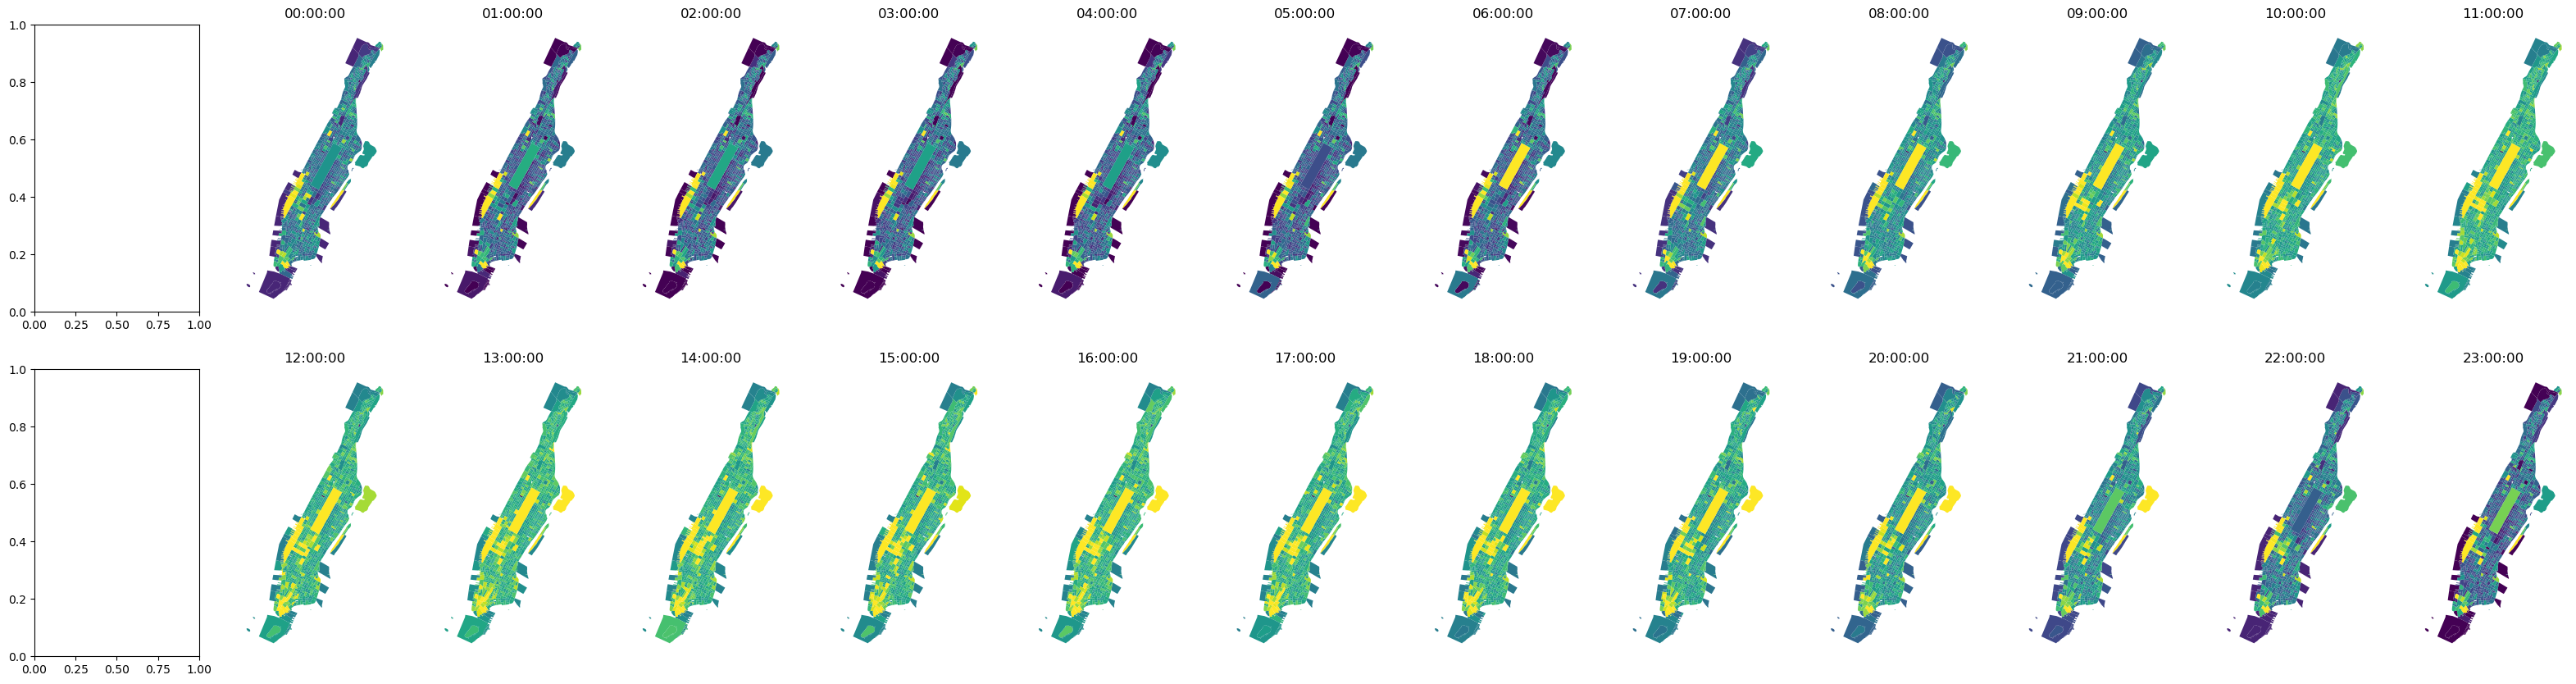

In [260]:
import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cmap = 'viridis'
# day = 18

target_county = 'New York, NY'
target_county = 'Centre, PA'
target_county = 'Richland, SC'
target_county = 'Lexington, SC'
target_county = 'Union, NJ'
target_county = 'Fairfax, VA'
target_county = 'Los Angeles, CA'
target_county = 'Cook, IL'
target_county = 'Harris, TX'
target_county = 'Maricopa, AZ'
target_county = 'San Diego, CA'
target_county = 'Orange, CA'
target_county = 'Miami-Dade, FL'
target_county = 'Dallas, TX'
target_county = 'King, WA'
target_county = 'Riverside, CA'
target_county = 'Hudson, NJ'
target_county = 'Essex, NJ'
target_county = 'Berkshire, MA'


def draw_county_map(target_county):
    target_county = 'New York, NY'
    county_FIPS = county_FIPS_dict[target_county]
    
    target_counties = [county_FIPS] # ['36061']   # 06039
    hourly_population_map_df['county_FIPS'] = hourly_population_map_df.reset_index()['CBG'].astype(str).str[:5].to_list()
    target_hourly_pop_df = hourly_population_map_df[hourly_population_map_df['county_FIPS'].isin(target_counties)]
    
    target_pop_df = ACS_df[ACS_df['county_FIPS'].isin(target_counties)]
    
    
    target_blockgroup_gdf = CBG2019_gdf[CBG2019_gdf['county_FIPS'].isin(target_counties)]
    target_blockgroup_gdf
    
    row_cnt = 2
    col_cnt = 13
    # vmax = max(target_hourly_pop_df.iloc[:, :hour_cnt].max(axis=1).max(), target_pop_df['totalpopulation'].max())
    # vmax = target_hourly_pop_df.iloc[:, :hour_cnt ].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).std() * 3
    print("target_hourly_pop_df:\n", target_hourly_pop_df.iloc[:, 1: hour_cnt + 1].mean(axis=1).mean())
    vmax = target_hourly_pop_df.iloc[:, 1: hour_cnt + 1].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, 1:hour_cnt + 1].mean(axis=1).std() * 3
    
    print("vmax: ", vmax)
    fig, axs = plt.subplots(figsize=(40, 10), nrows=row_cnt, ncols=col_cnt)
    
    # draw hourly map
    used_ax_cnt = 0
    hour_24_pop = []
    for row in range(row_cnt):
        for col in range(1, col_cnt, 1):
            # if used_ax_cnt == 24:
            #     continue
            merged_gdf = target_blockgroup_gdf.merge(target_hourly_pop_df, left_on='CBG', right_on='CBG')
            hour = used_ax_cnt
            ax=axs[row, col]
            ax.axis('off')
            ax.set_title(f"{hour:02}:00:00")
            hour_column = f'hour_{hour + 1 + 24*(day - 1)}'
            merged_gdf.plot(column=hour_column, ax=ax, vmax=vmax, cmap=cmap)  # , vmax=vmax ,  legend=True
            # merged_gdf.plot(column=hour_column, ax=ax, cmap=cmap)
            hour_24_pop.append(target_hourly_pop_df[hour_column].sum())
            used_ax_cnt += 1
    
    ax=axs[0, 0]
    ax.axis('off')
    ax.set_title(f"ACS 2019 Population")
    merged_gdf = target_blockgroup_gdf.merge(target_pop_df, left_on='CBG', right_on='CBG_FIPS')
    # merged_gdf.plot(column='totalpopulation', ax=ax,  cmap=cmap) # , vmax=vmax ,  legend=True
    merged_gdf.plot(column='totalpopulation', ax=ax, vmax=vmax, cmap=cmap)
    
    # draw county-level population
    ax=axs[1, 0]
    # ax.axis('off')
    ax.set_title('County hourly population')
    ax.set_ylabel('Population')
    ax.set_xlabel('Hour')
    ax.plot(hour_24_pop, label='hourly population')
    ax.axhline(merged_gdf['totalpopulation'].sum(), color='red', label='ACS population')
    ax.legend()
    
     
    fig.suptitle(f"Hourly population of county {target_county}: {year}-{month:02}-{day:02}", fontsize=24, y=1)
    
    
    # Add colorbar axes at the bottom and align it with the left and right of the subplots
    pos1 = axs[0, 0].get_position() # get the original position for first axis
    pos2 = axs[-1, -1].get_position()
    cax = fig.add_axes([pos1.x0 * 1.01, 0, (pos2.x1 - pos1.x0) * 0.99, 0.008])    # [left, bottom, width, height]  # bottom
    value_max =vmax
    value_min = 0
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
    sm._A = []
    # plt.colorbar(sm, cax=cax, label="Bias")
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
    
    for t in cbar.ax.get_xticklabels():
        t.set_fontsize(16)
    
    cbar.set_label('Population', labelpad=-80,   rotation=0, fontsize=24, loc='center')
    
    png_name = os.path.join(save_dir, f"{target_county.replace(', ', '_')}_hourly_population_{year}{month:02}{day:02}_v3.png")
    
    print("PNG name:", png_name)
    
    plt.savefig(png_name, dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.close()

for target_county, FIPS in tqdm(county_FIPS_dict.items()):
    print(target_county)
    for day in range(12, 31):
        draw_county_map(target_county)
    break

print("Done")

In [ ]:
target_hourly_pop_df
merged_gdf
hourly_population_map_df
target_blockgroup_gdf
target_county

# Extract data for South Carolina

In [ ]:
state_FIPS = '45'
year = '2023'
month = 6

houry_population_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_hourly_population_{year}{month:02}.csv')
print('houry_population_fname:', houry_population_fname)

inbound_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_hourly_inbound_{year}{month:02}.csv')
print('inbound_fname:', inbound_fname)

outbound_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_hourly_outbound_{year}{month:02}.csv')
print('inbound_fname:', outbound_fname)

device_distribution_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_monthly_device_distribution_{year}{month:02}.csv')
print('device_distribution_fname:', device_distribution_fname)

device_sampling_rate_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_monthly_device_sampling_rate_{year}{month:02}.csv')
print('device_sampling_rate_fname:', device_sampling_rate_fname)

In [ ]:
# Outbound
IPF_df = pd.read_csv(IPF_results_fname, dtype={'CBG':str}).set_index('CBG')

hour_cnt = IPF_df.shape[1]  
print(f"hour cnt: {hour_cnt}")

print("IPF total outbound (billion):", IPF_df.iloc[:, :].sum().sum()/ 10**9)

IPF_df

In [ ]:
# outbound_fname
extracted_IPF_df = IPF_df[IPF_df.index.str.startswith(state_FIPS)]
extracted_IPF_df.to_csv(outbound_fname, index=True)
extracted_IPF_df

In [ ]:
# Inbound
try:
    restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-8', dtype={'CBG':str}).set_index('CBG')
except:
    restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-16', dtype={'CBG':str}).set_index('CBG')

restored_actual_CBG_hourly_visitor_df = restored_actual_CBG_hourly_visitor_df.iloc[:, :hour_cnt]
print("Total restored visitor count (billion):", restored_actual_CBG_hourly_visitor_df.sum().sum() / 10**9)
restored_actual_CBG_hourly_visitor_df

In [ ]:
# inbound_fname
extracted_inboud_df = restored_actual_CBG_hourly_visitor_df[restored_actual_CBG_hourly_visitor_df.index.str.startswith(state_FIPS)]
extracted_inboud_df.to_csv(inbound_fname, index=True)
extracted_inboud_df

In [ ]:
# Load the hourly map
hourly_population_map_df = pd.read_csv(CBG_hourly_population_fname, dtype={'CBG':str}).set_index('CBG')
hourly_population_map_df

In [ ]:
# houry_population_fname
houry_population_df = hourly_population_map_df[hourly_population_map_df.index.str.startswith(state_FIPS)]
houry_population_df.to_csv(houry_population_fname, index=True)
houry_population_df

In [ ]:
# device distribution
device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={"origin":str, "destination":str})
device_home_areas_df


In [ ]:
# device_distribution_fname
extracted_device_distribution_df = device_home_areas_df[device_home_areas_df['destination'].str.startswith(state_FIPS)]
extracted_device_distribution_df = extracted_device_distribution_df[extracted_device_distribution_df['origin'].str.startswith(state_FIPS)]

extracted_device_distribution_df.to_csv(device_distribution_fname, index=False)
extracted_device_distribution_df

In [ ]:
# Load device sampling rate
print("Loading people_per_device_df from:", person_per_device_fname)
person_per_device_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS": str})

print("Total totalpopulation (billion):", person_per_device_df['totalpopulation'].sum() / 10**9)
person_per_device_df

In [ ]:
# device_sampling_rate_fname
extracted_person_per_device_df = person_per_device_df[person_per_device_df['CBG_FIPS'].str.startswith(state_FIPS)]
extracted_person_per_device_df.to_csv(device_sampling_rate_fname, index=False)
extracted_person_per_device_df